# Written By Max Levine

## Project 101

In [124]:
from glob import glob
from os.path import join
import os
import re
import pandas as pd
import leuktools as lk

class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

# paths = [
#     "/ifs/res/leukgen/local/opt/leukdc/data/analyses/66/79/76679/output",
#     "/ifs/res/leukgen/local/opt/leukdc/data/analyses/66/80/76680/output",
#     "/ifs/res/leukgen/local/opt/leukdc/data/analyses/66/81/76681/output",
#     "/ifs/res/leukgen/local/opt/leukdc/data/analyses/66/82/76682/output",
#     "/ifs/res/leukgen/local/opt/leukdc/data/analyses/66/83/76683/output",
#     "/ifs/res/leukgen/local/opt/leukdc/data/analyses/66/84/76684/output",
#     "/ifs/res/leukgen/local/opt/leukdc/data/analyses/66/85/76685/output",
#     "/ifs/res/leukgen/local/opt/leukdc/data/analyses/66/86/76686/output",
#     "/ifs/res/leukgen/local/opt/leukdc/data/analyses/66/88/76688/output",
#     "/ifs/res/leukgen/local/opt/leukdc/data/analyses/66/89/76689/output",
#     "/ifs/res/leukgen/local/opt/leukdc/data/analyses/66/90/76690/output",
#     "/ifs/res/leukgen/local/opt/leukdc/data/analyses/66/91/76691/output",
#     "/ifs/res/leukgen/local/opt/leukdc/data/analyses/66/92/76692/output",
#     "/ifs/res/leukgen/local/opt/leukdc/data/analyses/66/93/76693/output",
#     "/ifs/res/leukgen/local/opt/leukdc/data/analyses/66/94/76694/output",
#     "/ifs/res/leukgen/local/opt/leukdc/data/analyses/66/95/76695/output",
#     "/ifs/res/leukgen/local/opt/leukdc/data/analyses/66/96/76696/output",
#     "/ifs/res/leukgen/local/opt/leukdc/data/analyses/66/97/76697/output",
#     "/ifs/res/leukgen/local/opt/leukdc/data/analyses/66/98/76698/output",
#     "/ifs/res/leukgen/local/opt/leukdc/data/analyses/66/99/76699/output",
#     "/ifs/res/leukgen/local/opt/leukdc/data/analyses/67/00/76700/output",
#     "/ifs/res/leukgen/local/opt/leukdc/data/analyses/67/01/76701/output",
# ]

analyses_filters = [
    ("name", "FLT3ITD"),
    ("status", "SUCCEEDED"),
    ("projects__pk", 151),
]

analyses_list = list(lk.get_analyses(filters=analyses_filters))
paths = [a.outdir for a in analyses_list]

itd = pd.DataFrame(columns=["ID","FLT3ITD","TYPE","VAF"])
# itd = itd.set_index("ID")
index = 0
for p in paths:
    name = os.path.basename(glob(join(p,"*-H-*"))[0])
    f = glob(join(p,"*-H-*","*.summary.txt"))[0]
    with open(f, 'rb') as results:
        res = results.read().decode()
        res = res.split("Filtered")[0]
        if "No Events" in res:
            itd.loc[index] = [name, "NO", "NaN", "NaN"]
            index += 1
#             itd.at[name] =  ["NO", "NaN", "NaN"]
#             print(bcolors.OKGREEN + "NO ITD" + bcolors.ENDC)
        else:
#             vaf = float(re.search("(?:vaf=)([0-9.]*)", res).group(1))
            types = re.findall("(?:Type=)([A-Z:0-9]*)", res)
            vafs = re.findall("(?:vaf=)([0-9.]*)", res)
            for i,(ty,vaf) in enumerate(zip(types,vafs)):
                itd.loc[index] = [name, "YES", ty, "{0:.2f}".format(float(vaf))]
                index +=1
#                 itd.at[name] =  ["YES", ty, "{0:.2f}".format(float(vaf))]
#             print(bcolors.FAIL + "{0:.2f}".format(vaf) + bcolors.ENDC)
#             print(bcolors.FAIL + res + bcolors.ENDC)
# itd =  itd.reset_index()
print(itd)
itd.to_csv("p151_FLT3ITD.tsv",sep="\t",index=False)

                       ID FLT3ITD   TYPE   VAF
0    I-H-106617-T2-1-D1-1      NO    NaN   NaN
1    I-H-106620-T2-1-D1-1      NO    NaN   NaN
2    I-H-111025-T1-1-D1-1      NO    NaN   NaN
3    I-H-111026-T1-1-D1-1     YES    RPL  0.06
4    I-H-111026-T1-1-D1-1     YES    INV  0.04
5    I-H-111027-T1-1-D1-1      NO    NaN   NaN
6    I-H-111028-T1-1-D1-1     YES    RPL  0.02
7    I-H-111029-T1-1-D1-1      NO    NaN   NaN
8    I-H-111030-T1-1-D1-1      NO    NaN   NaN
9    I-H-111031-T1-1-D1-1      NO    NaN   NaN
10   I-H-108077-T2-1-D1-1      NO    NaN   NaN
11   I-H-111032-T1-1-D1-1     YES    RPL  0.03
12   I-H-109060-T2-1-D1-1      NO    NaN   NaN
13   I-H-109041-T2-1-D1-1      NO    NaN   NaN
14   I-H-111033-T1-1-D1-1      NO    NaN   NaN
15   I-H-111034-T1-1-D1-1      NO    NaN   NaN
16   I-H-111035-T1-1-D1-1      NO    NaN   NaN
17   I-H-111036-T1-1-D1-1      NO    NaN   NaN
18   I-H-111037-T1-1-D1-1     YES    RPL  0.04
19   E-H-111038-T1-1-D1-1      NO    NaN   NaN
20   E-H-1110

In [82]:
caveman = pd.read_csv("/ifs/res/leukgen/local/opt/leukdc/frontend/101/ANALYSES/annot_caveman__cosmic_81_exac_03__11/annot_caveman__cosmic_81_exac_03__11.tgd.annot.bed.coding.tsv.gz", sep="\t",header=1)
caveman = caveman[caveman["TARGET_NAME"].isin(["E-H-133637-T1-1-D1-1","E-H-133638-T1-1-D1-1","E-H-133639-T1-1-D1-1","E-H-133640-T1-1-D1-1","E-H-133641-T1-1-D1-1","E-H-133642-T1-1-D1-1","E-H-133643-T1-1-D1-1","E-H-133644-T1-1-D1-1","E-H-133645-T1-1-D1-1","E-H-133646-T1-1-D1-1","E-H-133647-T1-1-D1-1","E-H-133648-T1-1-D1-1","E-H-133649-T1-1-D1-1","E-H-133650-T1-1-D1-1","E-H-133651-T1-1-D1-1","E-H-133652-T1-1-D1-1","E-H-133653-T1-1-D1-1","E-H-133654-T1-1-D1-1","E-H-133655-T1-1-D1-1","E-H-133656-T1-1-D1-1","E-H-133657-T1-1-D1-1","E-H-133658-T1-1-D1-1"])]
caveman = caveman[caveman["REFERENCE_NAME"] == "E-H-108113-N1-1-D1-1"]
caveman = caveman[["TARGET_NAME","REFERENCE_NAME","CHR","START","END","REF","ALT","VT","FILTER","TARGET_VAF","TARGET_DEPTH","REFERENCE_VAF","REFERENCE_DEPTH","BIDIR","GENE","TRANSCRIPT","RNA_CHANGE","cDNA_CHANGE","PROTEIN_CHANGE","EFFECT","COSMIC","FIN_MAF","NFE_MAF","AFR_MAF","AMR_MAF","EAS_MAF","SAS_MAF","OTHER_MAF","FIN_TOTAL","NFE_TOTAL","AFR_TOTAL","AMR_TOTAL","EAS_TOTAL","SAS_TOTAL","OTHER_TOTAL","G1000_MAF"]]
caveman.to_csv("p101_batch2.snvs.tsv",sep="\t",index=False)

In [83]:
pindel = pd.read_csv("/ifs/res/leukgen/local/opt/leukdc/frontend/101/ANALYSES/annot_pindel__cosmic_81_exac_03__12/annot_pindel__cosmic_81_exac_03__12.tgd.annot.bed.coding.tsv.gz", sep="\t",header=1)
pindel = pindel[pindel["TARGET_NAME"].isin(["E-H-133637-T1-1-D1-1","E-H-133638-T1-1-D1-1","E-H-133639-T1-1-D1-1","E-H-133640-T1-1-D1-1","E-H-133641-T1-1-D1-1","E-H-133642-T1-1-D1-1","E-H-133643-T1-1-D1-1","E-H-133644-T1-1-D1-1","E-H-133645-T1-1-D1-1","E-H-133646-T1-1-D1-1","E-H-133647-T1-1-D1-1","E-H-133648-T1-1-D1-1","E-H-133649-T1-1-D1-1","E-H-133650-T1-1-D1-1","E-H-133651-T1-1-D1-1","E-H-133652-T1-1-D1-1","E-H-133653-T1-1-D1-1","E-H-133654-T1-1-D1-1","E-H-133655-T1-1-D1-1","E-H-133656-T1-1-D1-1","E-H-133657-T1-1-D1-1","E-H-133658-T1-1-D1-1"])]
pindel = pindel[pindel["REFERENCE_NAME"] == "E-H-108113-N1-1-D1-1"]
pindel = pindel[["TARGET_NAME","REFERENCE_NAME","CHR","START","END","REF","ALT","VT","FILTER","TARGET_VAF","TARGET_DEPTH","REFERENCE_VAF","REFERENCE_DEPTH","BIDIR","GENE","TRANSCRIPT","RNA_CHANGE","cDNA_CHANGE","PROTEIN_CHANGE","EFFECT","COSMIC","FIN_MAF","NFE_MAF","AFR_MAF","AMR_MAF","EAS_MAF","SAS_MAF","OTHER_MAF","FIN_TOTAL","NFE_TOTAL","AFR_TOTAL","AMR_TOTAL","EAS_TOTAL","SAS_TOTAL","OTHER_TOTAL","G1000_MAF"]]
pindel.to_csv("p101_batch2.indels.tsv",sep="\t",index=False)

# Karyoplot

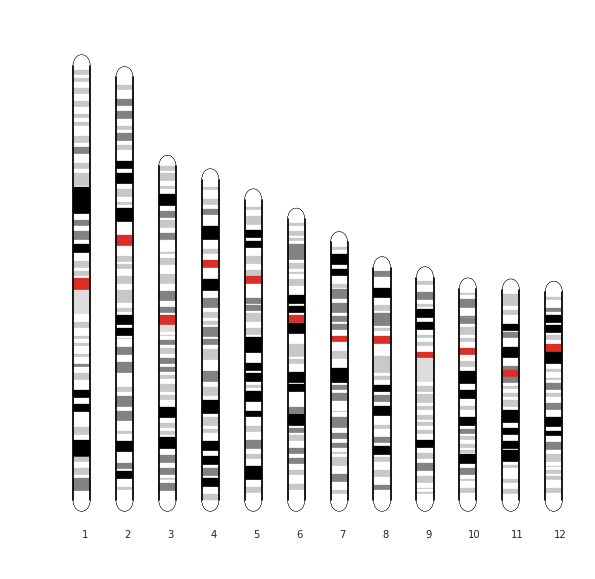

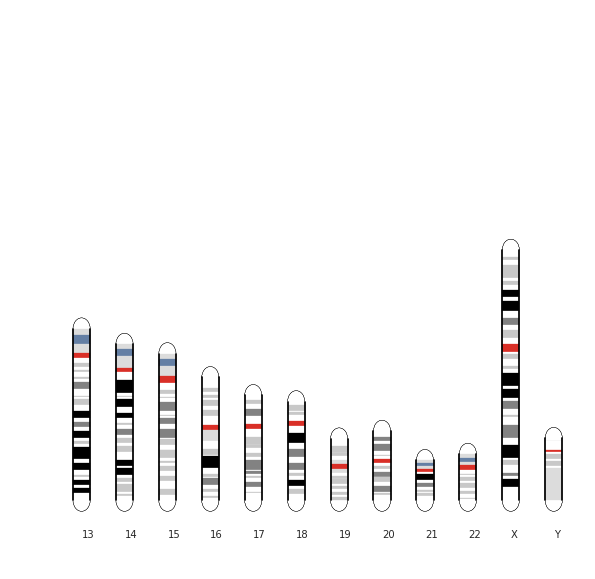

In [2]:
%matplotlib inline
import os
import matplotlib
from matplotlib.patches import Circle, Wedge, Polygon, Rectangle
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

def karyoplot(karyo_filename, metadata={}, part=1):
	'''
	To create a karyo_filename go to: http://genome.ucsc.edu/cgi-bin/hgTables 
	group: Mapping and Sequencing
	track: Chromosome Band 
	An example of an output (hg19, Human) is here: http://pastebin.com/6nBX6sdE 
	The script will plot dots next to loci defined in metadata as:
	metadata = {
		'1' : [2300000, 125000000, 249250621],
	}
'''

	karyo_dict={}
	with open(karyo_filename) as karyo_f:
		lines = [x.replace(os.linesep, '').split() for x in karyo_f.readlines()]

		for chromosome in [str(x) for x in range(1,23)] + ['X', 'Y']:
			karyo_dict[chromosome] = [[y[0], int(y[1]), int(y[2]), y[3], y[4]] for y in [x for x in lines if x[0] == 'chr' + chromosome]]

	fig, ax = plt.subplots(figsize=(10,10))

	DIM = 1.0

	ax.set_xlim([0.0, DIM * (1.3)])
	ax.set_ylim([0.0, DIM])

	def get_chromosome_length(chromosome):
		chromosome_start = float(min([x[1] for x in karyo_dict[chromosome]]))
		chromosome_end = float(max(x[2] for x in karyo_dict[chromosome]))
		chromosome_length = chromosome_end - chromosome_start

		return chromosome_length

	def plot_chromosome(chromosome, order):

		chromosome_length = get_chromosome_length(chromosome)
		chromosome_length_1 = get_chromosome_length('1')

		x_start = order * DIM * 0.1 
		x_end = x_start + (DIM * 0.04)
		y_start = DIM * 0.9 * (chromosome_length/chromosome_length_1)
		y_end = DIM * 0.1


		# We use the same colors as: http://circos.ca/tutorials/lessons/2d_tracks/connectors/configuration 
		colors = {
			'gpos100' : (0/255.0,0/255.0,0/255.0),
			'gpos'    : (0/255.0,0/255.0,0/255.0),
			'gpos75'  : (130/255.0,130/255.0,130/255.0),
			'gpos66'  : (160/255.0,160/255.0,160/255.0),
			'gpos50'  : (200/255.0,200/255.0,200/255.0),
			'gpos33'  : (210/255.0,210/255.0,210/255.0),
			'gpos25'  : (200/255.0,200/255.0,200/255.0),
			'gvar'    : (220/255.0,220/255.0,220/255.0),
			'gneg'    : (255/255.0,255/255.0,255/255.0),
			'acen'    : (217/255.0,47/255.0,39/255.0),
			'stalk'   : (100/255.0,127/255.0,164/255.0),
		}

		for index, piece in enumerate(karyo_dict[chromosome]):

			current_height = piece[2] - piece[1]
			current_height_sc = ((y_end - y_start) / chromosome_length) * current_height
			if index == 0:
				y_previous = y_start

			y_next = y_previous + current_height_sc

			color = colors.get(piece[4], (0/255.0,0/255.0,0/255.0))

			#plot the caryotypes
			r = Rectangle((x_start, y_previous), x_end-x_start, current_height_sc, color = color)
			ax.add_patch(r)

			y_previous = y_next

		#Plot semicircles at the beginning and end of the chromosomes
		center_x = x_start + (x_end-x_start)/2.0
		radius = (x_end-x_start)/2.0
		theta1 = 0.0
		theta2 = 180.0
		w1 = Wedge((center_x, y_start), radius, theta1, theta2, width=0.00002, facecolor='white', edgecolor='black')
		w2 = Wedge((center_x, y_end), radius, theta2, theta1, width=0.00002, facecolor='white', edgecolor='black')
		ax.add_patch(w1)
		ax.add_patch(w2)
		ax.plot([x_start, x_start], [y_start, y_end], ls='-', color='black')
		ax.plot([x_end, x_end], [y_start, y_end], ls='-', color='black')
# 		ax.plot([x_start + .02, x_start + .02], [y_start + radius, y_end - radius], ls='-', color='black')

		#Plot metadata
		if chromosome in metadata:
			for md in metadata[chromosome]:
				ax.plot([x_end + (DIM*0.015)], [y_start + (y_end-y_start) * (md/chromosome_length)], '.', color='black')

		ax.text(center_x, y_end - (DIM * 0.07), chromosome)

	if part==1:
		plot_chromosome('1', 1)
		plot_chromosome('2', 2)
		plot_chromosome('3', 3)
		plot_chromosome('4', 4)
		plot_chromosome('5', 5)
		plot_chromosome('6', 6)
		plot_chromosome('7', 7)
		plot_chromosome('8', 8)
		plot_chromosome('9', 9)
		plot_chromosome('10', 10)
		plot_chromosome('11', 11)
		plot_chromosome('12', 12)


	elif part==2:
		plot_chromosome('13', 1)
		plot_chromosome('14', 2)
		plot_chromosome('15', 3)
		plot_chromosome('16', 4)
		plot_chromosome('17', 5)
		plot_chromosome('18', 6)
		plot_chromosome('19', 7)
		plot_chromosome('20', 8)
		plot_chromosome('21', 9)
		plot_chromosome('22', 10)
		plot_chromosome('X', 11)
		plot_chromosome('Y', 12)

	else:
		raise Exception('plot argument should be either "1" or "2"')

	plt.axis('off')
	plt.show()

if __name__ == '__main__':
	import urllib
	fn = 'cytoband.txt'
	url = 'http://pastebin.com/raw.php?i=6nBX6sdE'
	if not os.path.exists(fn):
		print('Downloading %s to local file: %s' % (url, fn))
		with open(fn, 'w') as k_file:
			f = urllib.urlopen(url)
			k_file.write(f.read())

	karyoplot(fn, part=1)
	karyoplot(fn, part=2)

/ifs/work/leukgen/bin/python/.virtualenvs/users/leukbot/jupyterlab/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


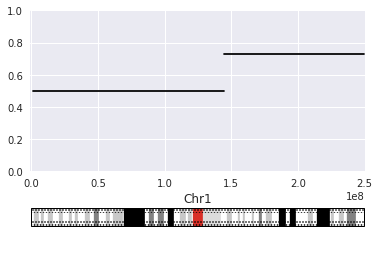

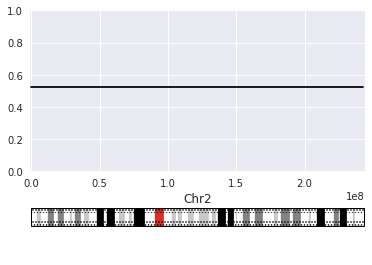

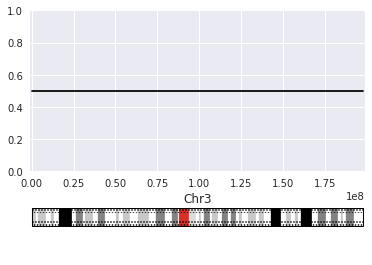

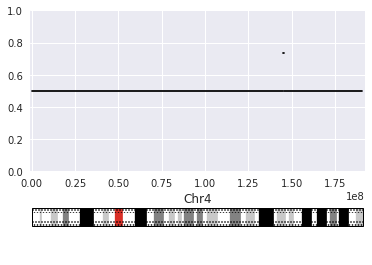

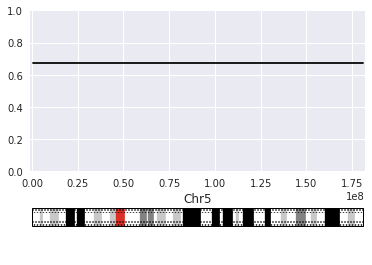

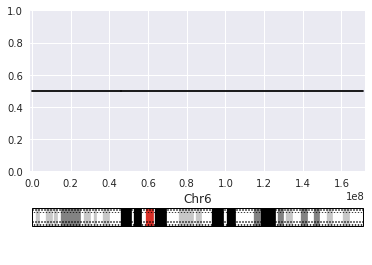

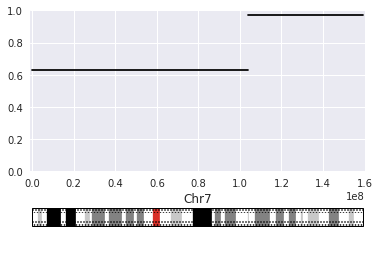

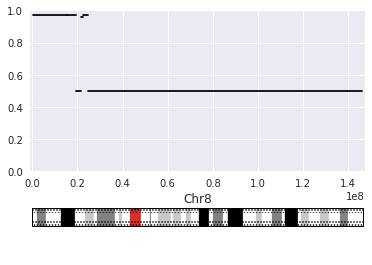

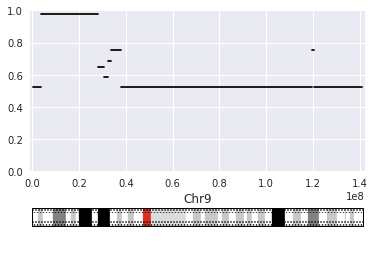

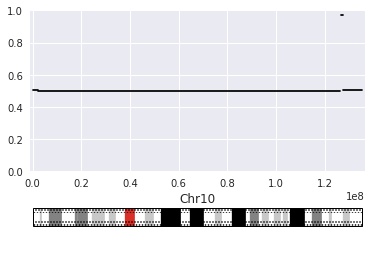

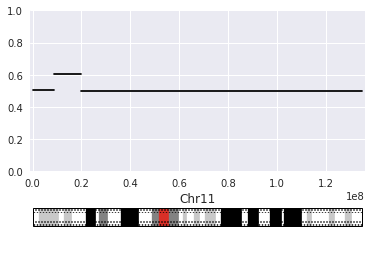

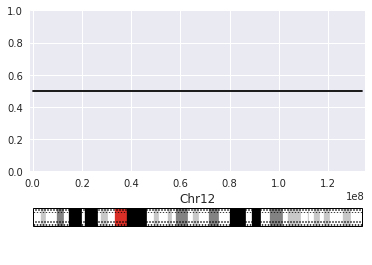

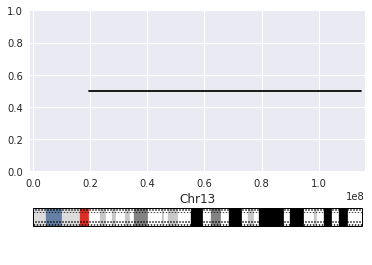

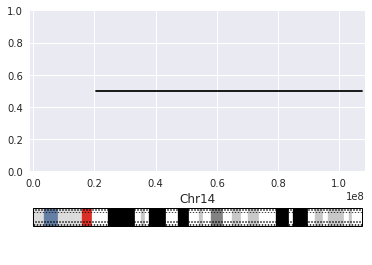

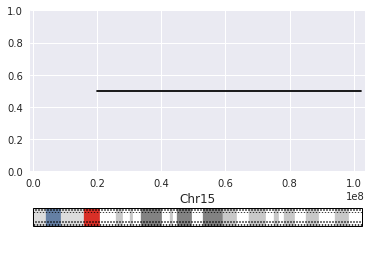

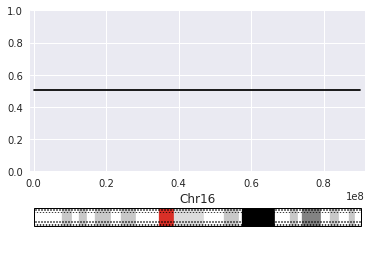

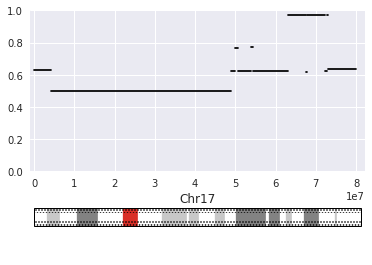

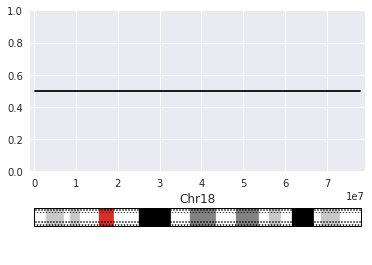

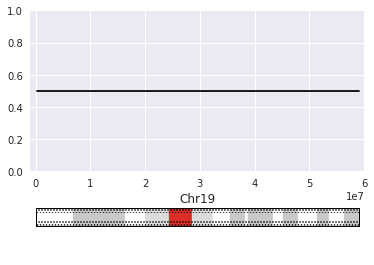

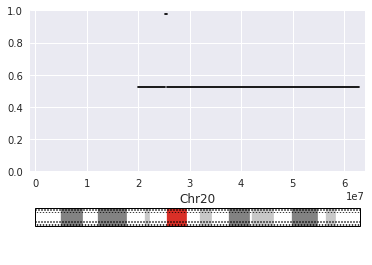

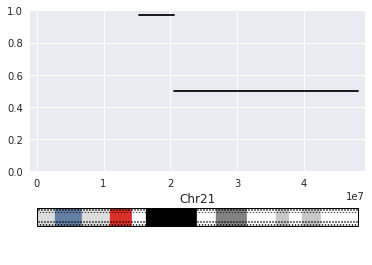

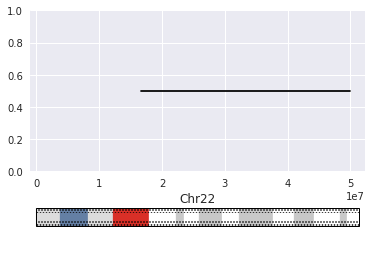

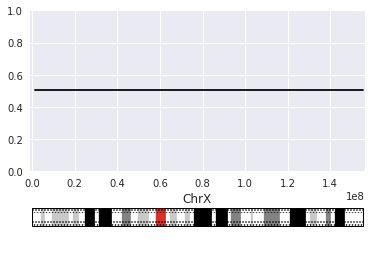

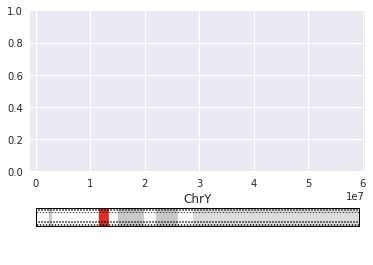

In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import gridspec
sns.set(style="white")

karyo_filename = "cytoband.txt"
karyo_dict={}
with open(karyo_filename) as karyo_f:
    lines = [x.replace(os.linesep, '').split() for x in karyo_f.readlines()]
    for chromosome in [str(x) for x in range(1,23)] + ['X', 'Y']:
        karyo_dict[chromosome] = [[y[0], int(y[1]), int(y[2]), y[3], y[4]] for y in [x for x in lines if x[0] == 'chr' + chromosome]]

def get_chromosome_length(chromosome):
    chromosome_start = float(min([x[1] for x in karyo_dict[chromosome]]))
    chromosome_end = float(max(x[2] for x in karyo_dict[chromosome]))
    chromosome_length = chromosome_end - chromosome_start
    return chromosome_length

colors = {
    'gpos100' : (0/255.0,0/255.0,0/255.0),
    'gpos'    : (0/255.0,0/255.0,0/255.0),
    'gpos75'  : (130/255.0,130/255.0,130/255.0),
    'gpos66'  : (160/255.0,160/255.0,160/255.0),
    'gpos50'  : (200/255.0,200/255.0,200/255.0),
    'gpos33'  : (210/255.0,210/255.0,210/255.0),
    'gpos25'  : (200/255.0,200/255.0,200/255.0),
    'gvar'    : (220/255.0,220/255.0,220/255.0),
    'gneg'    : (255/255.0,255/255.0,255/255.0),
    'acen'    : (217/255.0,47/255.0,39/255.0),
    'stalk'   : (100/255.0,127/255.0,164/255.0),
}

chromosome = "1"
for chromosome in [str(x) for x in range(1,23)] + ['X', 'Y']:
    df = pd.read_csv("/ifs/res/leukgen/local/opt/leukdc/data/analyses/93/12/9312/output/I-H-108299-T1-1-D1-1_subclones.txt", sep="\t")
    df = df[df["chr"] == chromosome]
    plt.figure()
    gs = gridspec.GridSpec(2, 1, height_ratios=[8, 1], hspace=0.4) 
    with sns.axes_style("darkgrid"):
        ax = plt.subplot(gs[0])
    ax.set_ylim(0,1)
    ax.set_xlim(-1000000,get_chromosome_length(chromosome)+1000000)
    for i,row in df.iterrows():
        ax.plot([int(row["startpos"]), int(row["endpos"])], [float(row["BAF"]), float(row["BAF"])], ls='-', color='black')

    ax2 = plt.subplot(gs[1], sharex=ax)
    ax2.axis("off")
    for index, piece in enumerate(karyo_dict[chromosome]):
        current_width = piece[2] - piece[1]

        if index == 0:
            x_previous = 0

        x_next = x_previous + current_width
        color = colors.get(piece[4], (0/255.0,0/255.0,0/255.0))

        #plot the caryotypes
        r = Rectangle((x_previous, 0.1), current_width, 0.9, color = color)
        ax2.add_patch(r)

        x_previous = x_next
    o = Rectangle((0, 0.1), get_chromosome_length(chromosome), .9, fill=False, ec="black", lw=1)
    ax2.add_patch(o)
    o = Rectangle((0, 0.1), get_chromosome_length(chromosome), .25, fill=False, lw=0, hatch="....")
    ax2.add_patch(o)
    o = Rectangle((0, 0.75), get_chromosome_length(chromosome), .9, fill=False, lw=0, hatch="....")
    ax2.add_patch(o)
    ax2.set_title("Chr" + chromosome)

In [10]:
import leuktools as lk
from glob import glob
from pwd import getpwuid
import shutil
import os
workflow_filters = [                                  
    ("technique__pk", 2),
    ("hasbam", True),
    ("hasfastq",True),
]
workflows = lk.get_workflows(filters=workflow_filters)
tofix = []
for w in workflows:
    warm = False
    try:
        w.fastqdir
    except:
        warm = True
    if not warm:
        users = [getpwuid(os.stat(fi).st_uid).pw_name for fi in (w.fastq_1 + w.fastq_2)]
        if "levinem1" in users:
            tofix.append(w)

In [ ]:
stagingdir = "/ifs/res/leukgen/local/opt/leukdc/staging/permtransfer"
for w in tofix:
    print(w.leukid)
    print(w.fastqdir)
    fastqs = [os.path.join(w.fastqdir, path) for path in os.listdir(w.fastqdir)]
    fastqstr = ' '.join(fastqs)
    actual = !md5sum $fastqstr
    actual = set([x.split(' ')[0] for x in actual])
    for fastq in fastqs:
        print("Copying", fastq)
        shutil.copy(fastq, stagingdir)
    copied = [os.path.join(stagingdir, path) for path in os.listdir(w.fastqdir)]
    copiedstr = ' '.join(fastqs)
    obser = !md5sum $copiedstr
    obser = set([x.split(' ')[0] for x in obser])
    if actual == observed:
        print("md5sum passed")
    else:
        print(actual)
        print(observed)
        raise Exception("md5sum failed")
    for fastq in fastqs:
        print("Removing", fastq)
        os.remove(fastq)
    for fastq in copied:
        print("Moving Copied", fastq)
        shutil.move(fastq, w.fastqdir)
    break

E-H-132274-T1-1-D1-1
/ifs/res/leukgen/local/opt/leukdc/data/workflows/55/29/35529/data/fastq
Copying /ifs/res/leukgen/local/opt/leukdc/data/workflows/55/29/35529/data/fastq/W0035529F_IC264T_C1WPEACXX_7_7nf_2.fastq.gz
Copying /ifs/res/leukgen/local/opt/leukdc/data/workflows/55/29/35529/data/fastq/W0035529F_IC264T_C1VPRACXX_7_7nf_2.fastq.gz
Copying /ifs/res/leukgen/local/opt/leukdc/data/workflows/55/29/35529/data/fastq/W0035529F_IC264T_C1VP7ACXX_7_7nf_2.fastq.gz
Copying /ifs/res/leukgen/local/opt/leukdc/data/workflows/55/29/35529/data/fastq/W0035529F_IC264T_C237TACXX_4_7nf_2.fastq.gz
Copying /ifs/res/leukgen/local/opt/leukdc/data/workflows/55/29/35529/data/fastq/W0035529F_IC264T_C1VP0ACXX_7_7nf_2.fastq.gz


In [12]:
tofix

[Workflow(35568, E-H-132294-N1-1-D1-1), Workflow(35569, E-H-132294-T1-1-D1-1)]

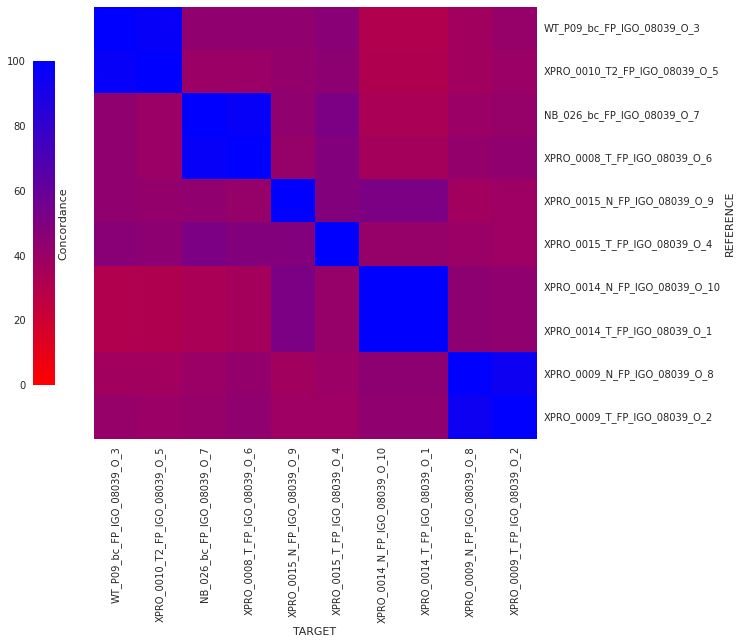

In [156]:
import seaborn as sns
import pandas as pd
from os.path import join
%matplotlib inline
sns.set()
fdir = "/ifs/res/leukgen/local/opt/leukdc/data/analyses/02/57/70257/output"
fdir = "/ifs/res/leukgen/local/opt/leukdc/data/analyses/99/11/69911/output"
# fdir = "/ifs/res/leukgen/local/opt/leukdc/data/analyses/10/12/71012/output"
# fdir = "/ifs/res/leukgen/home/levinem1/FingerprintingIGO/Conpair_results"
# fdir = "/ifs/work/leukgen/home/yellapav/sample_concordance/220/conpair_finger_het"
fdir = "/ifs/res/leukgen/home/levinem1/Project_08039_O/ConpairGeno"
out = pd.read_csv(join(fdir,"output.tsv"), sep="\t")
row_cluster = False
col_cluster = False
matrix = out.set_index(["REFERENCE","TARGET"]).unstack()["CONCORDANCE"]
if matrix.shape[0] > 1:
    row_cluster = True
if matrix.shape[1] > 1:
    col_cluster = True
cg = sns.clustermap(matrix,row_cluster=row_cluster,col_cluster=col_cluster,cmap=cm1,cbar_kws={"label": "Concordance"}, vmin=0,vmax=100)
cg.ax_col_dendrogram.remove()
cg.ax_row_dendrogram.remove()
cg.cax.set_position([.2, .2, .03, .45])
cg.cax.yaxis.tick_left()
cg.cax.yaxis.set_label_position("right")
cg.ax_heatmap.set_yticklabels(cg.ax_heatmap.get_yticklabels(),va="center");
cg.savefig("test.png")

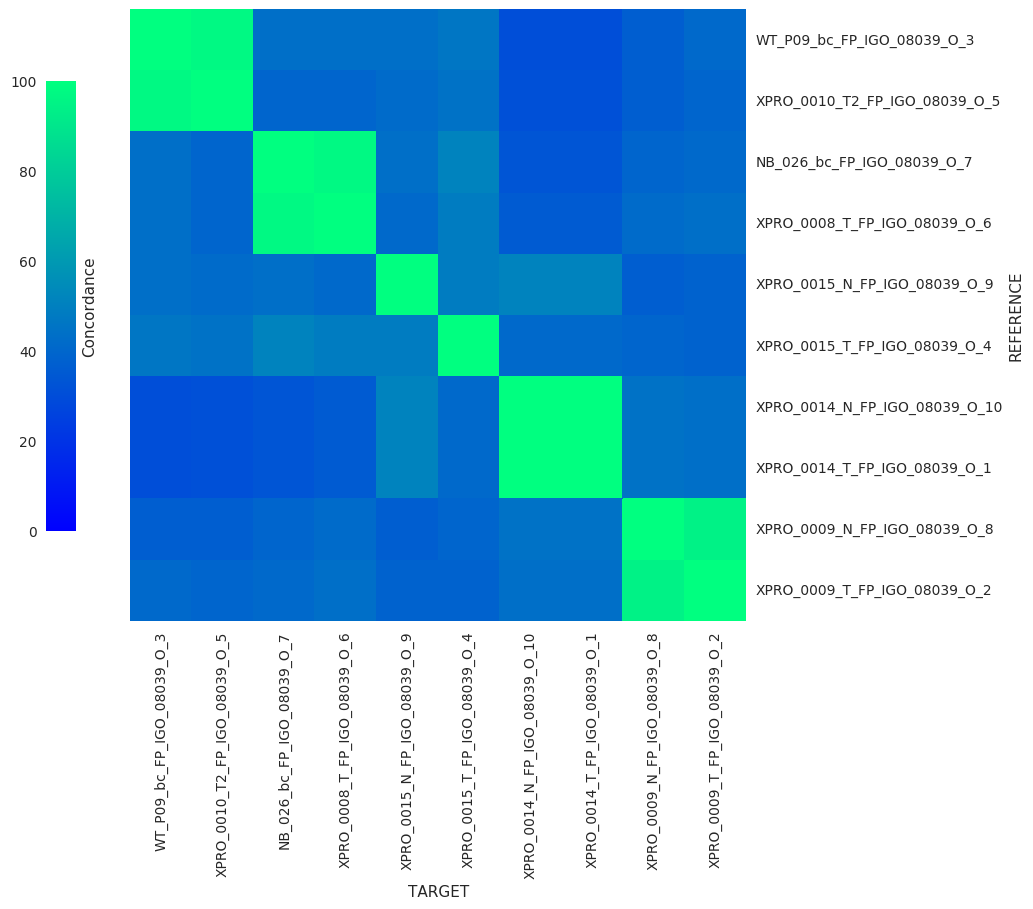

In [22]:
from IPython.display import Image
Image("/ifs/res/leukgen/home/levinem1/Project_08039_O/ConpairGeno/similarity_matrix.png") 
# !less /ifs/res/leukgen/home/levinem1/Project_08039_O/ConpairGeno/mismatched_pairs.tsv

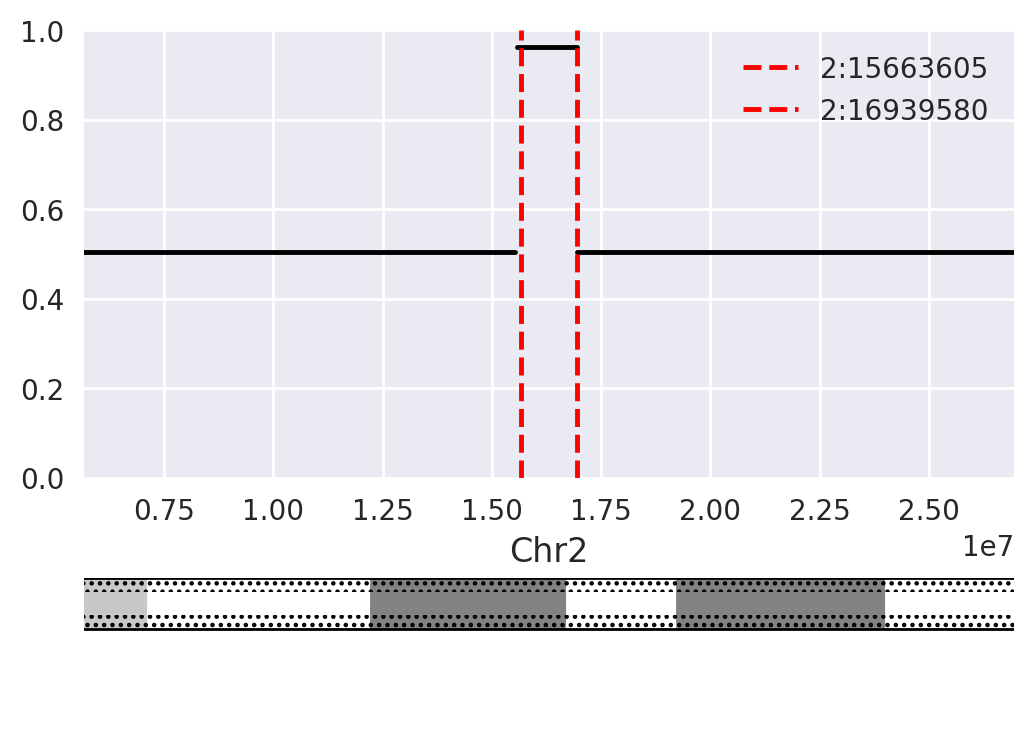

In [22]:
matplotlib.rcParams['figure.dpi']= 200

chromosome = "2"

df = pd.read_csv("/ifs/res/leukgen/local/opt/leukdc/data/analyses/09/18/10918/output/I-H-116984-T1-1-D1-1_subclones.txt", sep="\t")
df = df[df["chr"] == chromosome]
plt.figure()
gs = gridspec.GridSpec(2, 1, height_ratios=[8, 1], hspace=0.4) 
with sns.axes_style("darkgrid"):
    ax = plt.subplot(gs[0])
ax.set_ylim(0,1)
ax.set_xlim(-1000000,get_chromosome_length(chromosome)+1000000)
for i,row in df.iterrows():
    ax.plot([int(row["startpos"]), int(row["endpos"])], [float(row["BAF"]), float(row["BAF"])], ls='-', color='black')

ax2 = plt.subplot(gs[1], sharex=ax)
ax2.axis("off")
for index, piece in enumerate(karyo_dict[chromosome]):
    current_width = piece[2] - piece[1]

    if index == 0:
        x_previous = 0

    x_next = x_previous + current_width
    color = colors.get(piece[4], (0/255.0,0/255.0,0/255.0))

    #plot the caryotypes
    r = Rectangle((x_previous, 0.1), current_width, 0.9, color = color)
    ax2.add_patch(r)

    x_previous = x_next

o = Rectangle((0, 0.1), get_chromosome_length(chromosome), .9, fill=False, ec="black", lw=1)
ax2.add_patch(o)
o = Rectangle((0, 0.1), get_chromosome_length(chromosome), .25, fill=False, lw=0, hatch="....")
ax2.add_patch(o)
o = Rectangle((0, 0.75), get_chromosome_length(chromosome), .9, fill=False, lw=0, hatch="....")
ax2.add_patch(o)

breakpoint = [15663605,16939580]

ax.axvline(
    x=breakpoint[0],
    label=chromosome+":"+str(breakpoint[0]),
    color="red",
    linestyle="dashed"
    )
ax.axvline(
    x=breakpoint[1],
    label=chromosome+":"+str(breakpoint[1]),
    color="red",
    linestyle="dashed"
    )
ax2.set_title("Chr" + chromosome)

ax.set_xlim(breakpoint[0]-10000000, breakpoint[1]+10000000)
ax.legend()


In [44]:
%%time
import pysam
fa = pysam.FastaFile("/ifs/work/leukgen/ref/homo_sapiens/GRCh37d5/genome/gr37.fasta")
ref = fa.fetch(reference="7",start=15663605,end=15663615)
ref

CPU times: user 2 ms, sys: 1e+03 µs, total: 3 ms
Wall time: 1.24 ms


# Salmon Quantificaton

In [63]:
import leuktools as lk
from os.path import join
from glob import glob
import subprocess

outdir = "/ifs/res/leukgen/home/levinem1/226/"

workflows_filters = [
    ("technique__method", "WTA"),
    ("projects__pk__in", "226"),
    ("hasfastq", True)
]

workflows = list(lk.get_workflows(filters=workflows_filters))
for workflow in workflows:
    cmd = [
        "bsub", "-n", "8", "-We", "10",
        "salmon", "quant", "-i", "/ifs/work/leukgen/ref/homo_sapiens/GRCh37d5/salmon/gencode.v19.all_transcripts_index/", "-p", "16", "-l", "A",
        "-o", join(outdir, workflow.leukid),
        "-1"] + workflow.fastq_1 + [
        "-2"] + workflow.fastq_2
    subprocess.check_output(cmd)

In [94]:
import pandas as pd
allquant = []
for i,workflow in enumerate(workflows):
    print(workflow.leukid)
    quant = join(outdir, workflow.leukid, "quant.sf")
    df = pd.read_csv(quant, sep="\t")[["Name","TPM"]]
    df.columns = ["Transcript", workflow.leukid]
    df = df.set_index("Transcript") 
    if i == 0:
        allquant = df
    else:
        allquant = allquant.join(df)

I-H-121235-T1-1-R1-1
I-H-121235-N1-1-R1-1
I-H-121237-T1-1-R1-1
I-H-121238-T1-1-R1-1
I-H-121238-T1-1-R2-1
I-H-121239-T1-1-R1-1
I-H-121239-T1-1-R2-1
I-H-121240-T1-1-R1-1
I-H-121240-T1-1-R2-1
I-H-121241-T1-1-R1-1
I-H-121241-T1-1-R2-1
I-H-121241-T1-1-R3-1
I-H-121241-T1-1-R4-1
I-H-109039-T2-1-R1-1
I-H-109039-T2-1-R2-1
I-H-121242-T1-1-R1-1
I-H-121244-T1-1-R1-1
I-H-121245-T1-1-R1-1
I-H-121245-T1-1-R2-1
I-H-103918-T4-1-R1-1
I-H-103918-T4-1-R2-1
I-H-121246-T1-1-R1-1
I-H-121247-T1-1-R1-1
I-H-103911-T1-2-R1-1
I-H-103911-T1-2-R2-1
I-H-121249-T1-1-R1-1


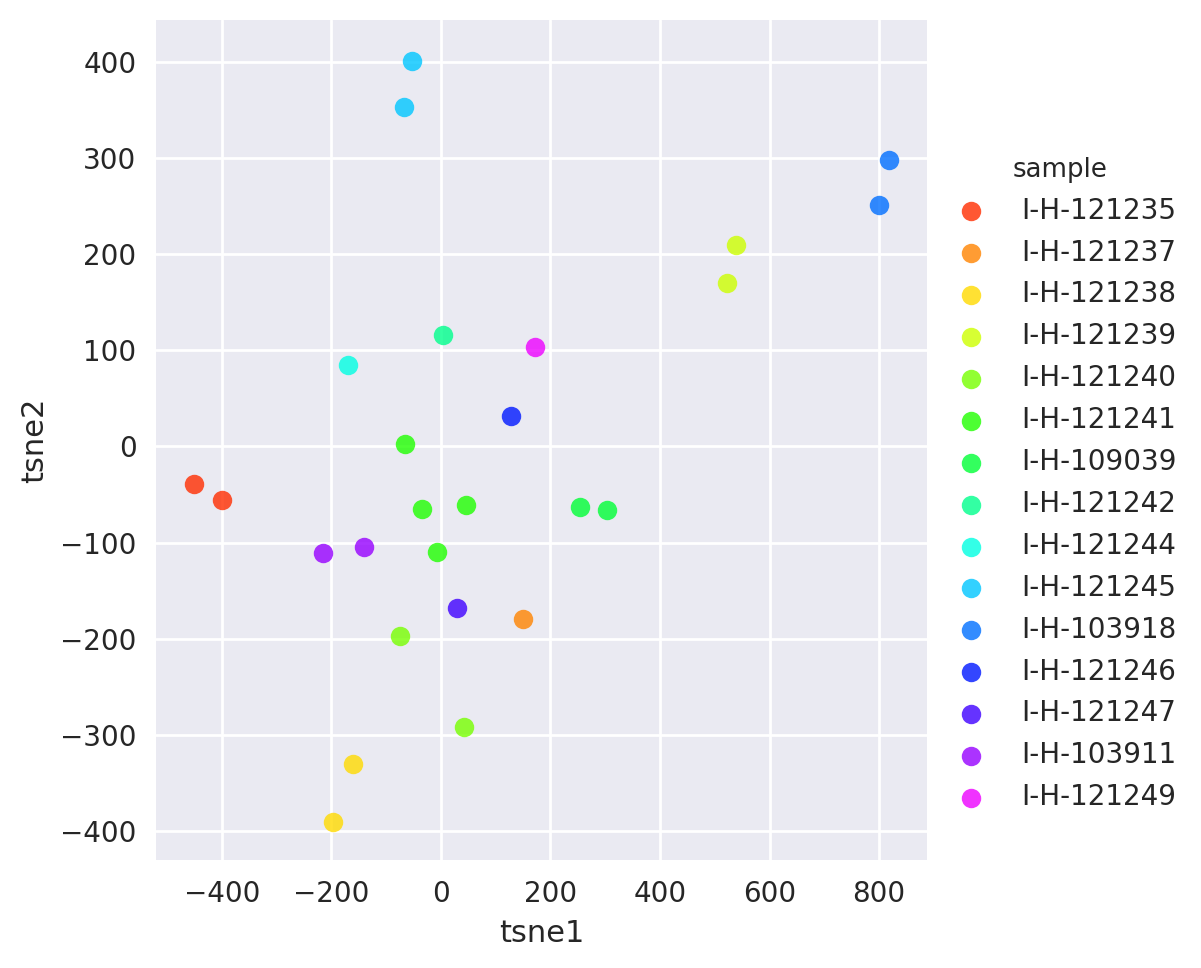

<Figure size 1200x800 with 0 Axes>

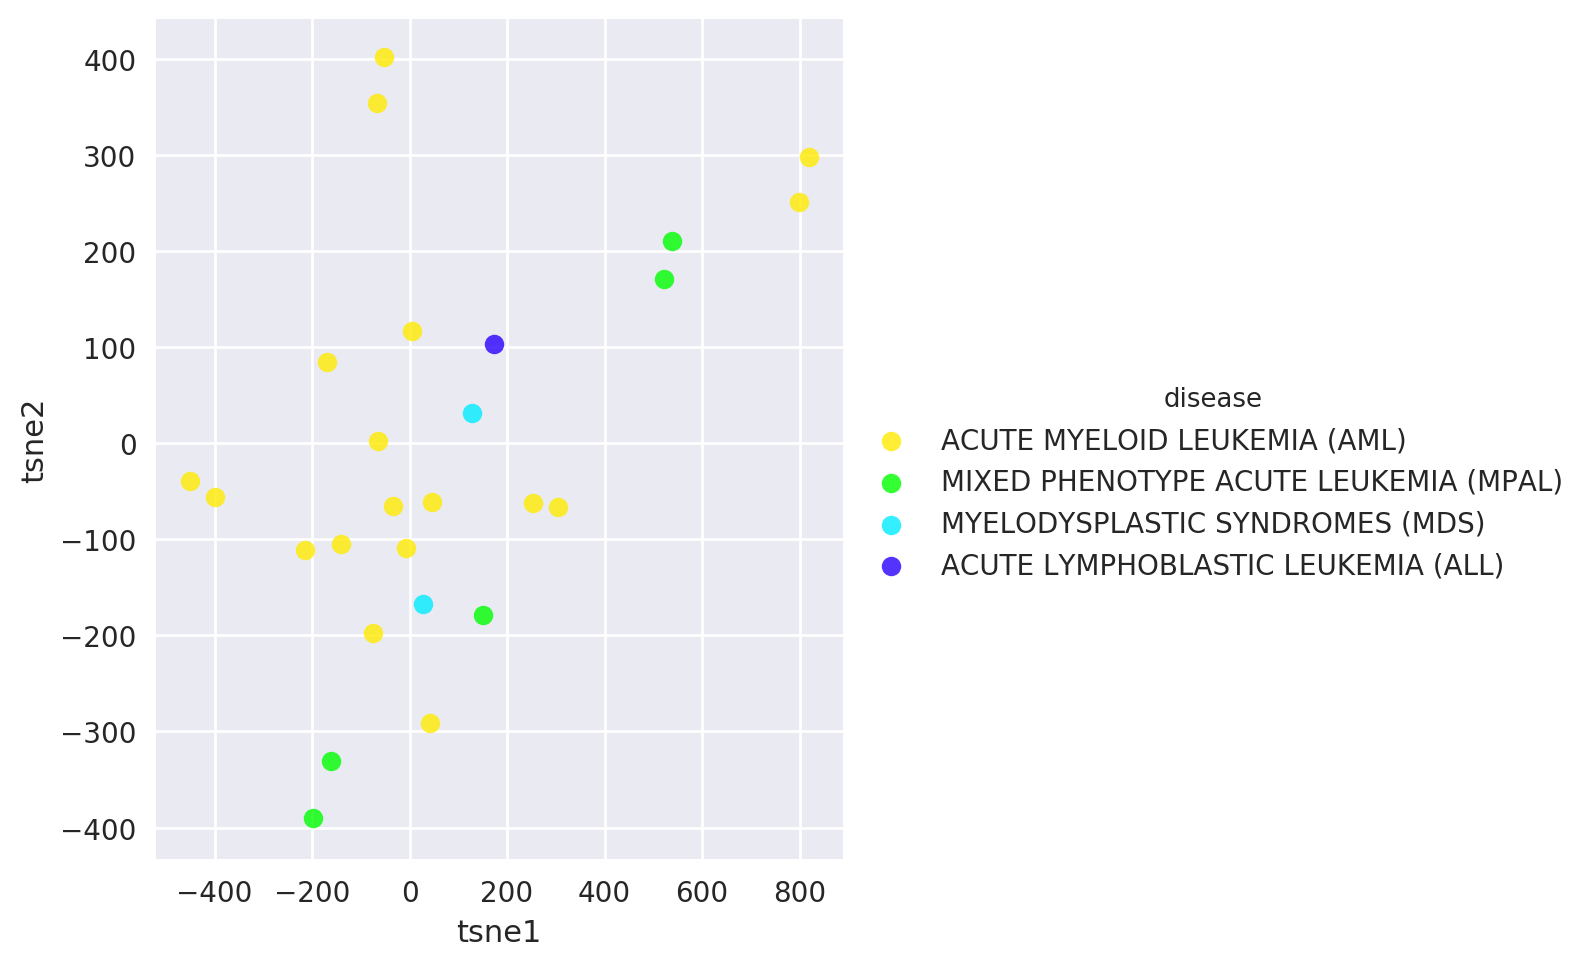

In [132]:
from sklearn import manifold, datasets, preprocessing, decomposition
import seaborn as sns
sns.set()

allquantnorm = pd.DataFrame(preprocessing.normalize(allquant), columns=allquant.columns, index=allquant.index).T
tsne = manifold.TSNE(n_components=2,  init='pca',random_state=0, perplexity=3)
Y = tsne.fit_transform(allquantnorm)
allquantnorm["tsne1"], allquantnorm["tsne2"] = Y[:,0], Y[:,1]
allquantnorm["sample"] = allquantnorm.index.str.slice(0,10)
allquantnorm["disease"] = [lk.Workflow(x).specimen.disease for x in allquantnorm.index]

sns.lmplot( x="tsne1", y="tsne2", data=allquantnorm, fit_reg=False, hue="sample", palette="gist_rainbow")
plt.figure()
sns.lmplot( x="tsne1", y="tsne2", data=allquantnorm, fit_reg=False, hue="disease", palette="gist_rainbow")

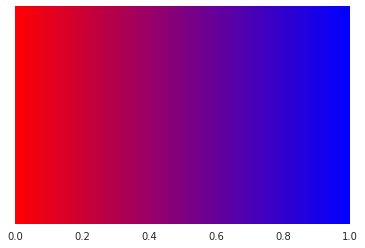

In [155]:
import matplotlib
cm1 = matplotlib.colors.LinearSegmentedColormap.from_list("ReBlu",["r","b"])
cb1 = matplotlib.colorbar.ColorbarBase(ax=plt.gca(),cmap=cm1,orientation='horizontal')

/ifs/work/leukgen/bin/python/.virtualenvs/users/leukbot/jupyterlab/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


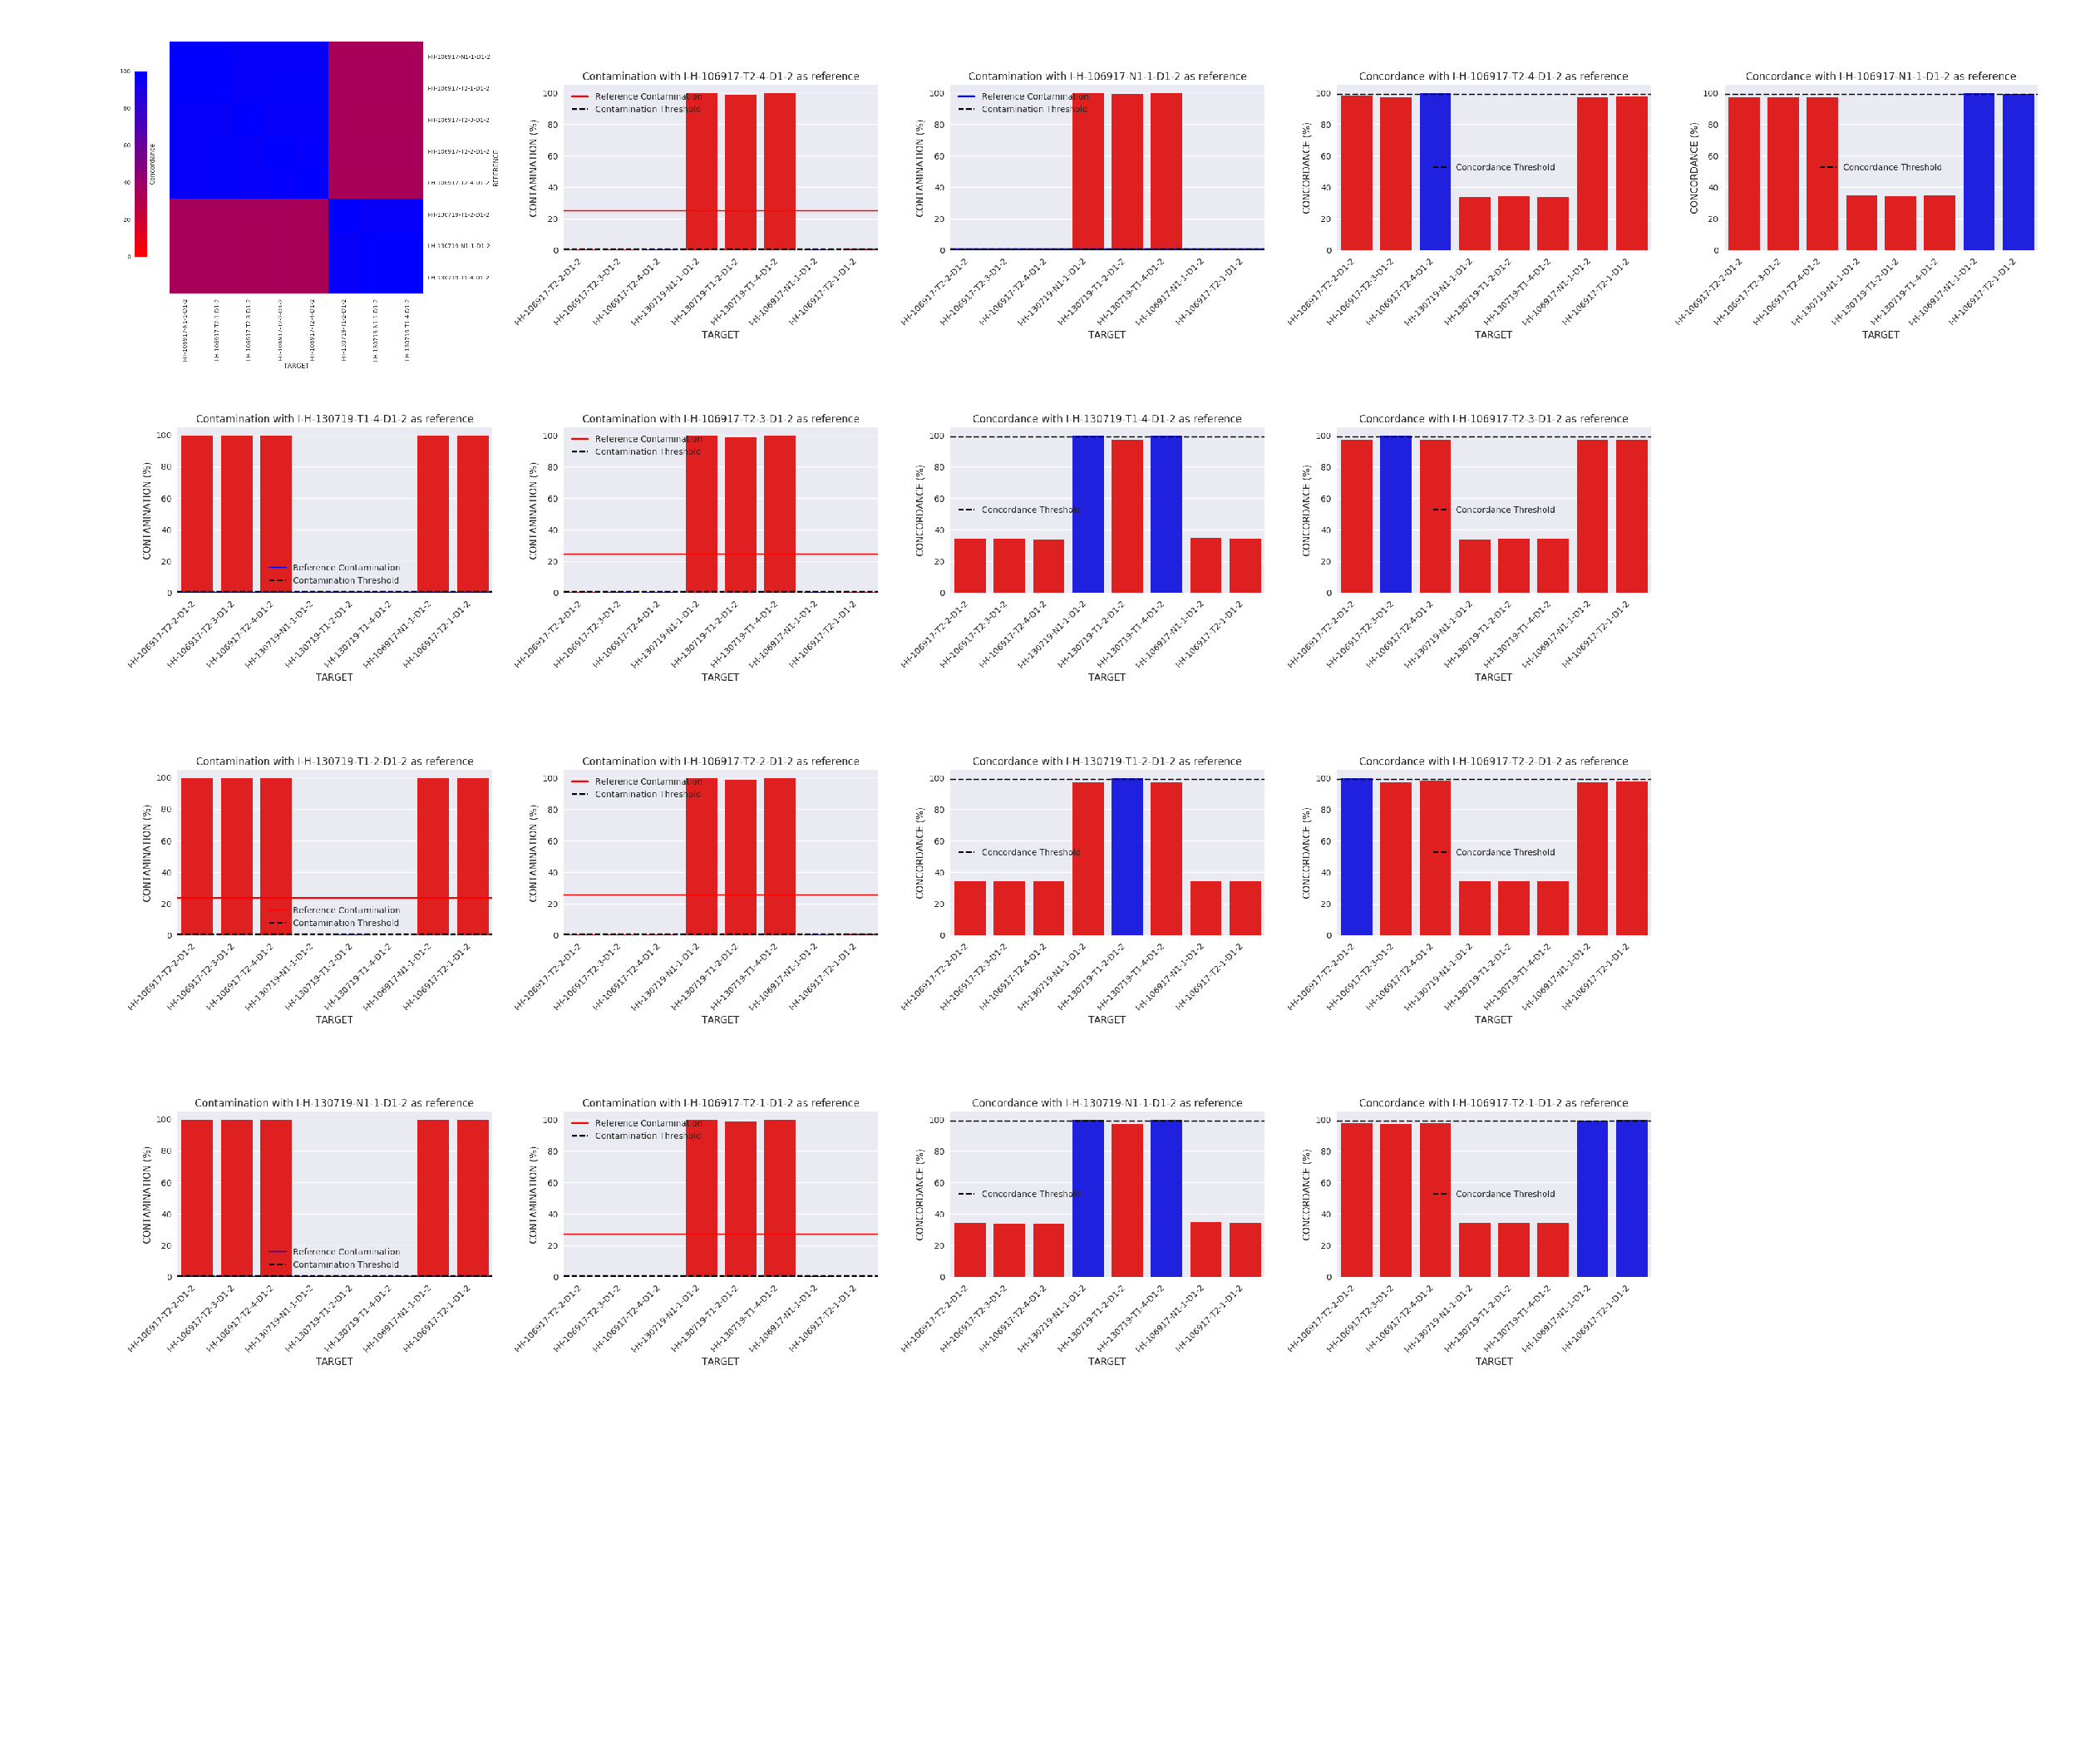

In [174]:
fdir = "/home/levinem1/deleteme/test/"
images = pd.DataFrame(columns=["Sample","path"]).set_index("Sample")
for img in reversed(sorted(list(glob(join(fdir,"*png"))))):
    sample = os.path.basename(img)
    images.set_value(sample,"path",img)
f, axarr = plt.subplots(4, 5,figsize=(10,10))
curr_row = 0
for index, row in images.reset_index().iterrows():
     a = plt.imread(row["path"])
     col = index % 4
     axarr[col,curr_row].imshow(a)
     if col == 3:
         curr_row += 1
for col in range(4):
    for row in range(5):
        axarr[col,row].set_axis_off()
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['figure.dpi'] = 300
plt.subplots_adjust(hspace=-0.6, wspace=0)

# Get MAF for Conpair

In [115]:
import requests
import json
import pandas as pd
from multiprocessing import Pool
pool = Pool(processes=4)
bedfile = "/ifs/work/leukgen/ref/homo_sapiens/GRCh37d5/conpair/IWG_snps_on_bait_design.txt"
bedfile = pd.read_csv(bedfile,sep="\t",header=None)

def getmaf(positions):
    chrom,pos,rs = positions
    if ";" in rs:
        rs = rs.split(";")[1]
    response = requests.get("http://myvariant.info/v1/variant/" + rs)
    content = json.loads(response.content)
    if isinstance(content, list):
        for entry in content:
            dbsnp = entry ["dbsnp"]
            if str(dbsnp["chrom"]) == str(chrom) and int(dbsnp["hg19"]["start"]) == int(pos):
                return [dbsnp["chrom"], dbsnp["hg19"]["start"], dbsnp["ref"], dbsnp["alt"], dbsnp["gmaf"]]
        return [chrom,pos,rs] + [None]*2
    try:
        dbsnp = content["dbsnp"]
    except:
        return [chrom,pos,rs] + [None]*2
    if str(dbsnp["chrom"]) == str(chrom) and int(dbsnp["hg19"]["start"]) == int(pos):
        try:
            return [dbsnp["chrom"], dbsnp["hg19"]["start"], dbsnp["ref"], dbsnp["alt"], dbsnp["gmaf"]]
        except:
            return [chrom,pos,rs] + [None]*2
    else:
        return [chrom,pos,rs] + [None]*2

results = pool.map(getmaf,bedfile.values)
pool.close()
pool.join()

In [140]:
df = pd.DataFrame(results)
df = df[~df[3].isnull()]
df.to_csv("/ifs/work/leukgen/ref/homo_sapiens/GRCh37d5/conpair/conpair_IWG_snp.txt",sep="\t",index=None,header=False)
df.columns = ["chrom","end","ref","alt","maf"]
df["start"] = df["end"]-1
df[["chrom","start","end"]].to_csv("/ifs/work/leukgen/ref/homo_sapiens/GRCh37d5/conpair/conpair_IWG_snp.bed",sep="\t",index=None,header=False)

# Calculate SNP het prop

In [27]:
%%time
import pysam
import collections
import pandas as pd
ref = pd.read_csv("/ifs/work/leukgen/ref/homo_sapiens/GRCh37d5/conpair/conpair_IWG_snps.txt",sep="\t",header=None)
bam = pysam.AlignmentFile("/ifs/res/leukgen/local/opt/leukdc/data/workflows/59/46/35946/data/bam/I-H-132704-T1-1-D1-1.bam")
hetmap = []
for _,row in ref.iterrows():
    chrom,end,ref,alt,_ = row.values
    start = end - 1
    sequence=""
    for read in bam.fetch(chrom,start,end):
        # Make sure read doesnt have indels and such
        if len(read.cigartuples) == 1 and read.cigartuples[0][0] == 0:
            sequence+=read.query_sequence[start-read.pos]
    counts = collections.Counter(l for l in sequence)
    try:
        het = abs((counts[alt]/(counts[ref] + counts[alt])) - 0.5) <= 0.20
        hetmap.append([chrom,end,het])
    except:
        # Likely ref alt is incorrect
        print(row.values)
print("% Het", pd.DataFrame(hetmap)[2].sum()/(len(pd.DataFrame(hetmap)[2])))

['5' 178268132 'A' 'T' 0.5365]
['13' 25694340 'A' 'C' 0.5333]
['19' 56752041 'C' 'G' 0.5411]
['Y' 19370916 'G' 'A' 0.2774]
% Het 0.41681901279707495
CPU times: user 5.9 s, sys: 78 ms, total: 5.98 s
Wall time: 6 s


# Sandbox

In [28]:
pysam.faidx.usage()

'Usage: samtools faidx <file.fa|file.fa.gz> [<reg> [...]]\n'

In [45]:
import leuktools as lk
filters = [
    ("projects","267"),
]

i = lk.get_individuals(filters=filters)
for ind in i:
    w = lk.get_workflows(filters=[("individual__leukid",ind.leukid),("hasbam",True),('technique__method', 'WGS')])
    workflows = list(w)
    normals = [w.leukid for w in workflows if w.specimen.source_type == "NORMAL"]
    tumors = [w.leukid for w in workflows if w.specimen.source_type == "TUMOR"]
    if len(workflows) > 1:
        print("lk","run_conpair","-rfi","leukid__in",",".join(normals),"-fi","leukid__in",",".join(tumors),"--commit")


lk run_conpair -rfi leukid__in I-H-133671-N1-1-D1-1 -fi leukid__in I-H-133671-T2-1-D1-1 --commit
lk run_conpair -rfi leukid__in I-H-133672-N1-1-D1-1 -fi leukid__in I-H-133672-T2-1-D1-1 --commit
lk run_conpair -rfi leukid__in I-H-133673-N1-1-D1-1 -fi leukid__in I-H-133673-T2-1-D1-1 --commit
lk run_conpair -rfi leukid__in I-H-133674-N1-1-D1-1 -fi leukid__in I-H-133674-T6-1-D1-1 --commit
lk run_conpair -rfi leukid__in I-H-133675-N1-1-D1-1 -fi leukid__in I-H-133675-T2-1-D1-1 --commit
lk run_conpair -rfi leukid__in I-H-134202-N1-1-D1-1 -fi leukid__in I-H-134202-T2-1-D1-1,I-H-134202-T1-2-D1-1 --commit
lk run_conpair -rfi leukid__in I-H-134753-N1-1-D1-1 -fi leukid__in I-H-134753-T1-1-D1-1 --commit
lk run_conpair -rfi leukid__in I-H-134754-N1-1-D1-1 -fi leukid__in I-H-134754-T1-1-D1-1 --commit
lk run_conpair -rfi leukid__in I-H-134755-N1-1-D1-1 -fi leukid__in I-H-134755-T1-1-D1-1 --commit
lk run_conpair -rfi leukid__in I-H-134756-N1-1-D1-1 -fi leukid__in I-H-134756-T1-1-D1-1 --commit
lk run_co

In [46]:
normals

['I-H-134757-N1-1-D1-1']

In [119]:
# %%time
import pysam
import collections
import pandas as pd
# f = !lk get_data I-H-113387-T1-1-D1-1
# f = f[0]
bam = pysam.AlignmentFile(minibam1)
sequence=""
chrom = "1"
pos = 3587
start = pos-1
for read in bam.fetch(chrom,start,pos):
    # Make sure read doesnt have indels and such
    if len(read.cigartuples) == 1 and read.cigartuples[0][0] == 0:
        sequence+=read.query_sequence[start-read.pos]
sequence

'GAAAGGGAAAAGGAAAAAAAAAAAAAGGAAAAAAAAGGGGAGAAGAAGGGGGGAAAGGGAGAAAAAAAAAAGGGGAAAGAAAAAAGAGGGGGAGG'

# PDX FACETS Report

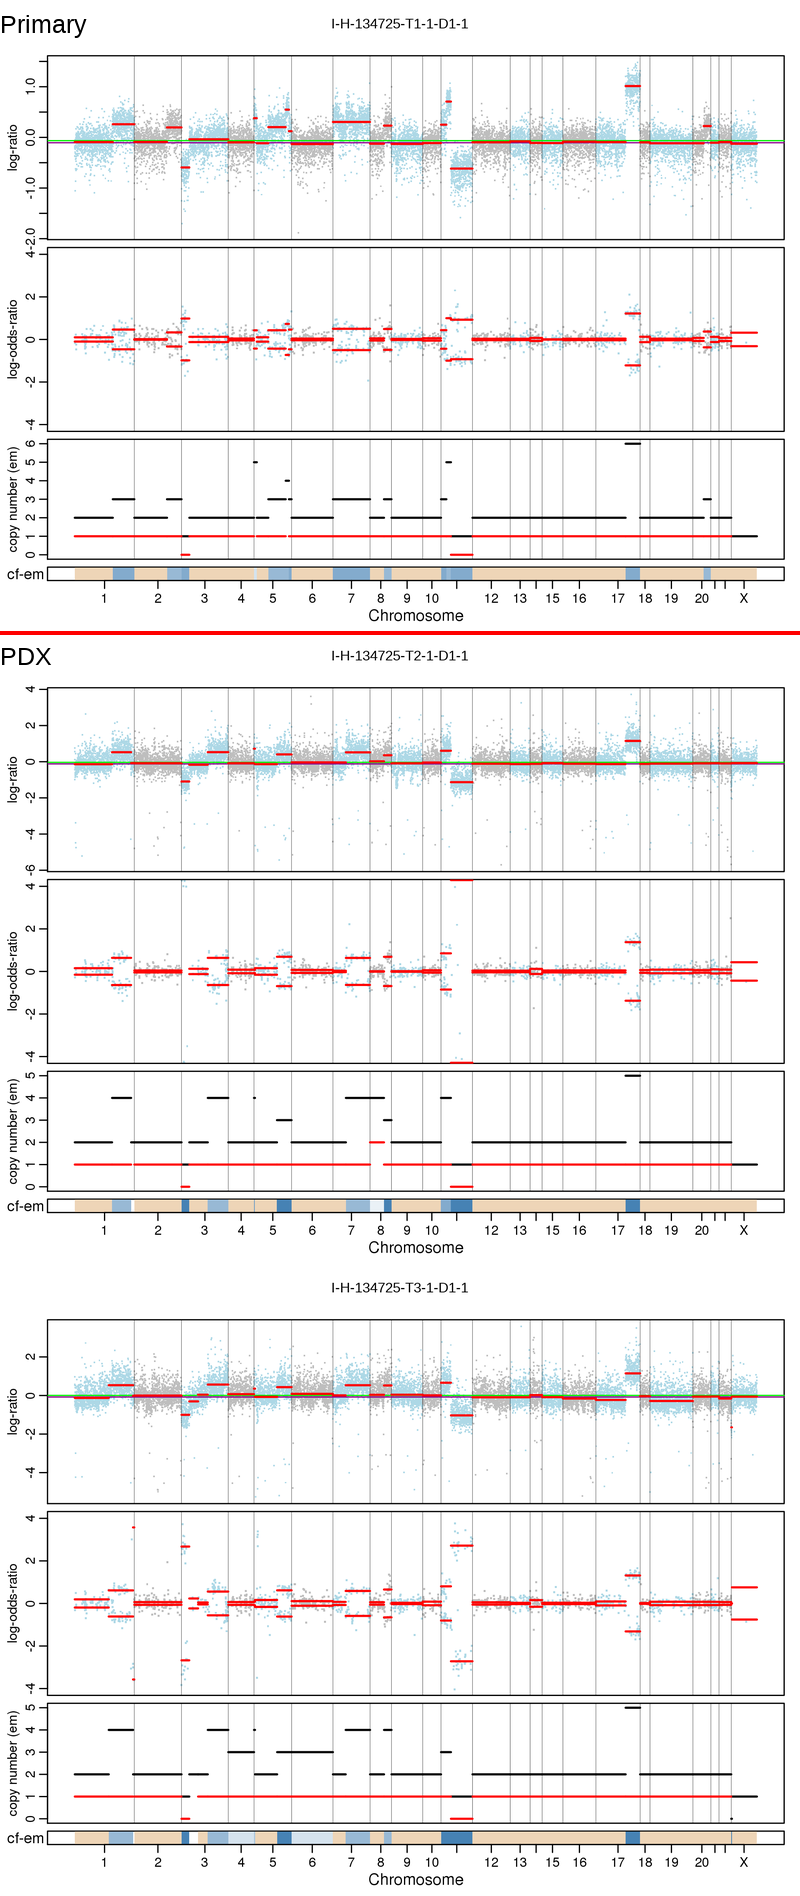

In [6]:
import leuktools as lk
from PIL import Image, ImageDraw, ImageFont
from glob import glob
from os.path import join

individual = "I-H-134725"
crop = False
resize = 0.4

def processimage(png, label, crop, resize):
    img = Image.open(png)
    if crop:
        top = img.crop(box=(0,0,2000,520))
        bottom = img.crop(box=(0,1000,2000,1500))
        new_im = Image.new('RGB', (2000, 1100), "white")
        new_im.paste(top, (0,80))
        new_im.paste(bottom, (0,600))
    else:
        new_im = Image.new('RGB', (img.width, img.height + 80), "white")
        new_im.paste(img, (0,80))

    # Add sample label
    font = ImageFont.truetype("/usr/share/fonts/liberation/LiberationSans-Regular.ttf", 35, encoding="unic")
    draw = ImageDraw.Draw(new_im)
    w, h = draw.textsize(label, font=font)
    draw.text(((new_im.width-w)/2,(110-h)/2),label,fill="black", font=font)
    
    # resize
    new_im = new_im.resize((int(new_im.width*resize),int(new_im.height*resize)),Image.ANTIALIAS)
    return new_im

# get workflows
workflows = lk.get_workflows(filters=[("individual__leukid",individual),("specimen__source_type","TUMOR"),("technique__name__in","IMPACT-410,IMPACT-468")])

primarys = []
pdxs = []
for workflow in workflows:
    if workflow.specimen.is_pdx == "YES":
        pdxs.append(workflow)
    else:
        primarys.append(workflow)

# process images
primages = []
for pr in primarys:
    facets = lk.get_analyses(filters=[("name","FACETS"),("as_target__leukid",pr.leukid)])
    facets = list(facets)[0]
    facetspng = glob(join(facets.outdir, "*png"))[0]
    primages.append(processimage(facetspng, pr.leukid, crop, resize))
pdximages = []
for pdx in pdxs:
    facets = lk.get_analyses(filters=[("name","FACETS"),("as_target__leukid",pdx.leukid)])
    facets = list(facets)[0]
    facetspng = glob(join(facets.outdir, "*png"))[0]
    pdximages.append(processimage(facetspng, pdx.leukid, crop, resize))
    
if len(primages + pdximages) < 1:
    print("NO IMAGES")
else:
    widths, heights = zip(*(i.size for i in (primages + pdximages)))

    # merge images
    widths, heights = zip(*(i.size for i in (primages + pdximages)))
    mergedimage = Image.new('RGB', (max(widths), sum(heights)), "white")
    for i,image in enumerate(primages + pdximages):
        mergedimage.paste(image, (0, sum(heights[:i])))

    # Add divider and labels
    draw = ImageDraw.Draw(mergedimage)
    font = ImageFont.truetype("/usr/share/fonts/liberation/LiberationSans-Regular.ttf", 25, encoding="unic")
    if len(primages) > 0 and len(pdximages) > 0:
        draw.line((0,sum(heights[:len(primages)]),mergedimage.width,sum(heights[:len(primages)])), width=4, fill="red")
    if len(primages) > 0:
        draw.text((0,10),"Primary",fill="black", font=font)
    if len(pdximages) > 0:
        draw.text((0,sum(heights[:len(primages)])+10),"PDX",fill="black", font=font)

mergedimage

# CBioPortal API Call

In [142]:
import requests
from IPython.core.display import HTML
import json
payload = {"sampleIds":["P-0019201-T01-IM6"]}
r = requests.post('http://www.cbioportal.org/api/molecular-profiles/msk_impact_2017_mutations/mutations/fetch?projection=DETAILED', json=payload)
print(r)
json.loads(r.text)

<Response [200]>


[]

In [24]:
import requests
from requests.auth import HTTPBasicAuth
import pandas as pd
from io import BytesIO
r = requests.get('http://data.cbioportal.mskcc.org/hg/dmp/raw-file/tip/mixedpact/data_mutations_extended.txt', auth=HTTPBasicAuth('levinem1', 'gu2=M*'))
# print(pd.read_csv(BytesIO(r.content), sep="\t", comment='#').columns.values)
df = pd.read_csv(BytesIO(r.content), sep="\t", comment='#')
df.loc[:,"Individual"] = df["Tumor_Sample_Barcode"].str[0:9]
df[df["Individual"] == "P-0028435"]

Hugo_Symbol  Entrez_Gene_Id Center NCBI_Build Chromosome  \
28326      INPPL1               0  MSKCC     GRCh37         11   
28327         PGR               0  MSKCC     GRCh37         11   

       Start_Position  End_Position Strand Variant_Classification  \
28326        71943376      71943376      +      Missense_Mutation   
28327       100920734     100920734      +      Missense_Mutation   

      Variant_Type     ...            HGVSp CCDS ExAC_AF_OTH EXON  SAS_MAF  \
28326          SNP     ...      p.Ala570Ser  NaN         NaN  NaN      NaN   
28327          SNP     ...      p.Pro805Gln  NaN         NaN  NaN      NaN   

      Exon_Number  MINIMISED                        HGVSc  PUBMED  Individual  
28326         NaN        NaN  ENST00000298229.2:c.1708G>T     NaN   P-0028435  
28327         NaN        NaN  ENST00000325455.5:c.2414C>A     NaN   P-0028435  

[2 rows x 124 columns]

In [130]:
r = requests.get('http://data.cbioportal.mskcc.org/hg/dmp/raw-file/tip/mixedpact/data_fusions.txt', auth=HTTPBasicAuth('levinem1', 'gu2=M*'))
# print(pd.read_csv(BytesIO(r.content), sep="\t", comment='#').columns.values)
df = pd.read_csv(BytesIO(r.content), sep="\t", comment='#')
df.loc[:,"Individual"] = df["Tumor_Sample_Barcode"].str[0:9]
df[df["Individual"] == "P-0028435"]

Hugo_Symbol  Entrez_Gene_Id     Center Tumor_Sample_Barcode  \
9981        TP53               0  MSKCC-DMP    P-0028435-T01-IM6   
9982    TBC1D22B               0  MSKCC-DMP    P-0028435-T01-IM6   

                    Fusion DNA_support RNA_support  Method         Frame  \
9981  TBC1D22B-TP53 fusion         yes     unknown     NaN  out of frame   
9982  TBC1D22B-TP53 fusion         yes     unknown     NaN  out of frame   

                                               Comments Individual  
9981  TP53 (NM_000546) rearrangement: t(17;6)(p13.1;...  P-0028435  
9982  TP53 (NM_000546) rearrangement: t(17;6)(p13.1;...  P-0028435

In [128]:
r = requests.get('http://data.cbioportal.mskcc.org/hg/dmp/raw-file/tip/mixedpact/mixedpact_data_cna_hg19.seg', auth=HTTPBasicAuth('levinem1', 'gu2=M*'))
# print(pd.read_csv(BytesIO(r.content), sep="\t", comment='#').columns.values)
df = pd.read_csv(BytesIO(r.content), sep="\t", comment='#')
df.loc[:,"Individual"] = df["ID"].str[0:9]
df[df["Individual"] == "P-0028435"]

ID chrom  loc.start    loc.end  num.mark  seg.mean  \
1460723  P-0028435-T01-IM6     1    2488138  120548082       421    0.1143   
1460724  P-0028435-T01-IM6     1  120572570  246670438       249   -0.3867   
1460725  P-0028435-T01-IM6     2    4717089   39222396        94    0.0386   
1460726  P-0028435-T01-IM6     2   39224121   39233612         3   -0.2300   
1460727  P-0028435-T01-IM6     2   39234253   39262586        10    0.0480   
1460728  P-0028435-T01-IM6     2   39278357   39285880         4   -0.2405   
1460729  P-0028435-T01-IM6     2   39294832   95849288       117    0.1285   
1460730  P-0028435-T01-IM6     2   96919700  193562208       120   -0.2311   
1460731  P-0028435-T01-IM6     2  198257106  242800953       136    0.1995   
1460732  P-0028435-T01-IM6     3    1449872    6610068         4   -0.0572   
1460733  P-0028435-T01-IM6     3    9040994  116506471       311   -0.3606   
1460734  P-0028435-T01-IM6     3  118605469  194238390       231    0.0906   
1460735  P-0028435-T01-IM6     4    1402650   55604659       104    0.0116   
1460736  P-0028435-T01-IM6     4   55946219   94653694        66    0.2632   
1460737  P-0028435-T01-IM6     4   99802236  143114294        43   -0.1773   
1460738  P-0028435-T01-IM6     4  143129630  143159091         3   -0.7657   
1460739  P-0028435-T01-IM6     4  143181681  190262486        65   -0.3538   
1460740  P-0028435-T01-IM6     5     218502    4089201        34   -0.2596   
1460741  P-0028435-T01-IM6     5    4577842  180076517       411    0.0519   
1460742  P-0028435-T01-IM6     6     393261   37141789       162   -0.4492   
1460743  P-0028435-T01-IM6     6   39190287   45769418        22    1.5191   
1460744  P-0028435-T01-IM6     6   46910415  125258137       124   -0.2117   
1460745  P-0028435-T01-IM6     6  134758313  170798891        84    0.1185   
1460746  P-0028435-T01-IM6     7    1672540   56749207       129    0.3917   
1460747  P-0028435-T01-IM6     7   64721546  158450965       215    0.1037   
1460748  P-0028435-T01-IM6     8     565232  145743127       254    0.1197   
1460749  P-0028435-T01-IM6     9     421980   20781979        84   -0.3733   
1460750  P-0028435-T01-IM6     9   21968235   22012061        10   -1.1970   
1460751  P-0028435-T01-IM6     9   27109615   27687159        24   -0.3914   
1460752  P-0028435-T01-IM6     9   28385672   31112857         3   -0.1071   
...                    ...   ...        ...        ...       ...       ...   
1460768  P-0028435-T01-IM6    13   21004738  111119077       213   -0.3414   
1460769  P-0028435-T01-IM6    14   20347564   38345849        46    0.1034   
1460770  P-0028435-T01-IM6    14   46730899   50455087         4   -0.2152   
1460771  P-0028435-T01-IM6    14   50551034   85173227        50    0.1031   
1460772  P-0028435-T01-IM6    14   87813031  105906073        44   -0.3625   
1460773  P-0028435-T01-IM6    15   26216370   26933228         2   -0.1223   
1460774  P-0028435-T01-IM6    15   33009761   77033934       136   -0.3848   
1460775  P-0028435-T01-IM6    15   78164706   99861618        87    0.0936   
1460776  P-0028435-T01-IM6    16     115072   89882984       362    0.0496   
1460777  P-0028435-T01-IM6    17     114669    7577554        24   -0.4579   
1460778  P-0028435-T01-IM6    17    7578233   10552488        33    1.3687   
1460779  P-0028435-T01-IM6    17   11396377   12044521        14    0.9031   
1460780  P-0028435-T01-IM6    17   13964744   21809394        59    1.6937   
1460781  P-0028435-T01-IM6    17   29422358   80783009       414    0.0718   
1460782  P-0028435-T01-IM6    18     724528   46385291        66    0.0482   
1460783  P-0028435-T01-IM6    18   48573541   48604732        11   -0.4171   
1460784  P-0028435-T01-IM6    18   51274836   56409172        19    0.0951   
1460785  P-0028435-T01-IM6    18   56411649   57571761         8   -0.3132   
1460786  P-0028435-T01-IM6    18   59254138   74387299        14    0.0719   
1460787  P-0028435-T01-IM6    19    1207058   

# PDX Venn Diagram

/ifs/work/leukgen/bin/python/.virtualenvs/users/leukbot/jupyterlab/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (119) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


I-H-134722-T1-1-D1-1 2394
I-H-134722-T10-1-D1-1 434
I-H-134722-T11-1-D1-1 537
I-H-134722-T12-1-D1-1 432
I-H-134722-T2-1-D1-1 427
I-H-134722-T3-1-D1-1 498
I-H-134722-T4-1-D1-1 348
I-H-134722-T5-1-D1-1 504
I-H-134722-T6-1-D1-1 501
I-H-134722-T7-1-D1-1 571
I-H-134722-T8-1-D1-1 472
I-H-134722-T9-1-D1-1 492


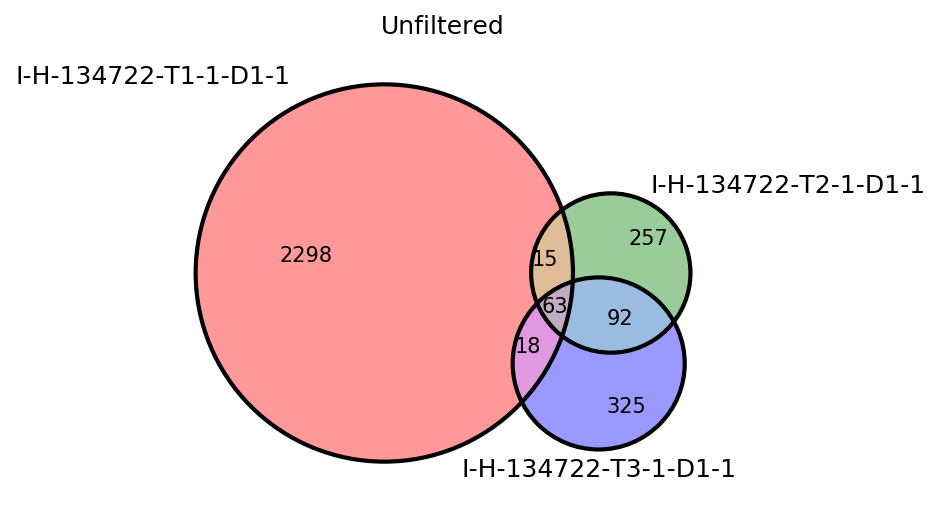

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['figure.dpi'] = 150

allcalls = pd.read_csv("I-H-134722.csv")
samples = sorted(allcalls.TARGET_NAME.unique())
bysample = {}
for group,df in allcalls.groupby("TARGET_NAME"):
    bed = df[["CHR","START","REF","ALT"]]
    bed = set([tuple(x) for x in bed.values])
    bysample[group] = bed
    print(group,len(bed))
    
first = "I-H-134722-T1-1-D1-1"
second = "I-H-134722-T2-1-D1-1"
third = "I-H-134722-T3-1-D1-1"

firstset = bysample[first]
secondset = bysample[second]
thirdset = bysample[third]
# print (first,len(firstset))
# print(second,len(secondset))
# print(third,len(thirdset))

# Subset sizes
s = (
    len(firstset-secondset-thirdset),    # Abc
    len(secondset-firstset-thirdset),    # aBc
    len(set.intersection(firstset,secondset)-thirdset),    # ABc
    len(thirdset-firstset-secondset),    # abC
    len(set.intersection(firstset,thirdset)-secondset),    # AbC
    len(set.intersection(secondset,thirdset)-firstset),  # aBC
    len(set.intersection(firstset,secondset,thirdset)),    # ABC
)

v = venn3(subsets=s, set_labels=(first, second, third))
c = venn3_circles(subsets=s, linestyle='solid')
plt.title("Unfiltered")
plt.show()

In [144]:
allcalls["ID_VARIANT"] = allcalls.CHR.astype(str) + "_" + allcalls.START.astype(str) + "_" + allcalls.REF.astype(str) + "_" + allcalls.ALT.astype(str)
allcalls[allcalls["ID_VARIANT"].isin(["2_29443697_A_C","5_1295228_G_A","12_133209265_C_A","1_27106071_G_T"])].set_index("ID_VARIANT").sort_index()["PASSED_BY"]


ID_VARIANT
12_133209265_C_A    C,M,S
1_27106071_G_T        C,S
2_29443697_A_C      C,M,S
2_29443697_A_C      C,M,S
2_29443697_A_C      C,M,S
2_29443697_A_C      C,M,S
2_29443697_A_C      C,M,S
2_29443697_A_C      C,M,S
2_29443697_A_C      C,M,S
2_29443697_A_C      C,M,S
2_29443697_A_C      C,M,S
2_29443697_A_C        M,S
2_29443697_A_C      C,M,S
2_29443697_A_C      C,M,S
Name: PASSED_BY, dtype: object

I-H-134722-T1-1-D1-1 199
I-H-134722-T10-1-D1-1 19
I-H-134722-T11-1-D1-1 43
I-H-134722-T12-1-D1-1 27
I-H-134722-T2-1-D1-1 40
I-H-134722-T3-1-D1-1 35
I-H-134722-T4-1-D1-1 20
I-H-134722-T5-1-D1-1 38
I-H-134722-T6-1-D1-1 18
I-H-134722-T7-1-D1-1 52
I-H-134722-T8-1-D1-1 38
I-H-134722-T9-1-D1-1 30


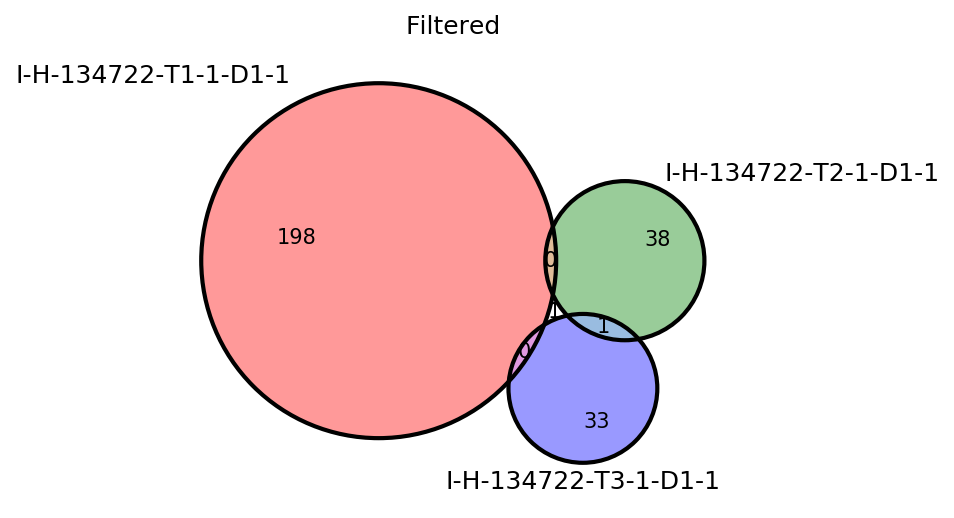

In [139]:
allcalls = pd.read_csv("I-H-134722_mutation_filtered.csv")
samples = sorted(allcalls.TARGET_NAME.unique())
bysample = {}
for group,df in allcalls.groupby("TARGET_NAME"):
    bed = df[["CHR","START","REF","ALT"]]
    bed = set([tuple(x) for x in bed.values])
    bysample[group] = bed
    print(group,len(bed))
    
first = "I-H-134722-T1-1-D1-1"
second = "I-H-134722-T2-1-D1-1"
third = "I-H-134722-T3-1-D1-1"

firstset = bysample[first]
secondset = bysample[second]
thirdset = bysample[third]
# print (first,len(firstset))
# print(second,len(secondset))
# print(third,len(thirdset))

# Subset sizes
s = (
    len(firstset-secondset-thirdset),    # Abc
    len(secondset-firstset-thirdset),    # aBc
    len(set.intersection(firstset,secondset)-thirdset),    # ABc
    len(thirdset-firstset-secondset),    # abC
    len(set.intersection(firstset,thirdset)-secondset),    # AbC
    len(set.intersection(secondset,thirdset)-firstset),  # aBC
    len(set.intersection(firstset,secondset,thirdset)),    # ABC
)

v = venn3(subsets=s, set_labels=(first, second, third))
c = venn3_circles(subsets=s, linestyle='solid')
plt.title("Filtered")
plt.show()

In [141]:
set.intersection(firstset,secondset,thirdset)

{('2', 29443697, 'A', 'C')}

# CNVlib

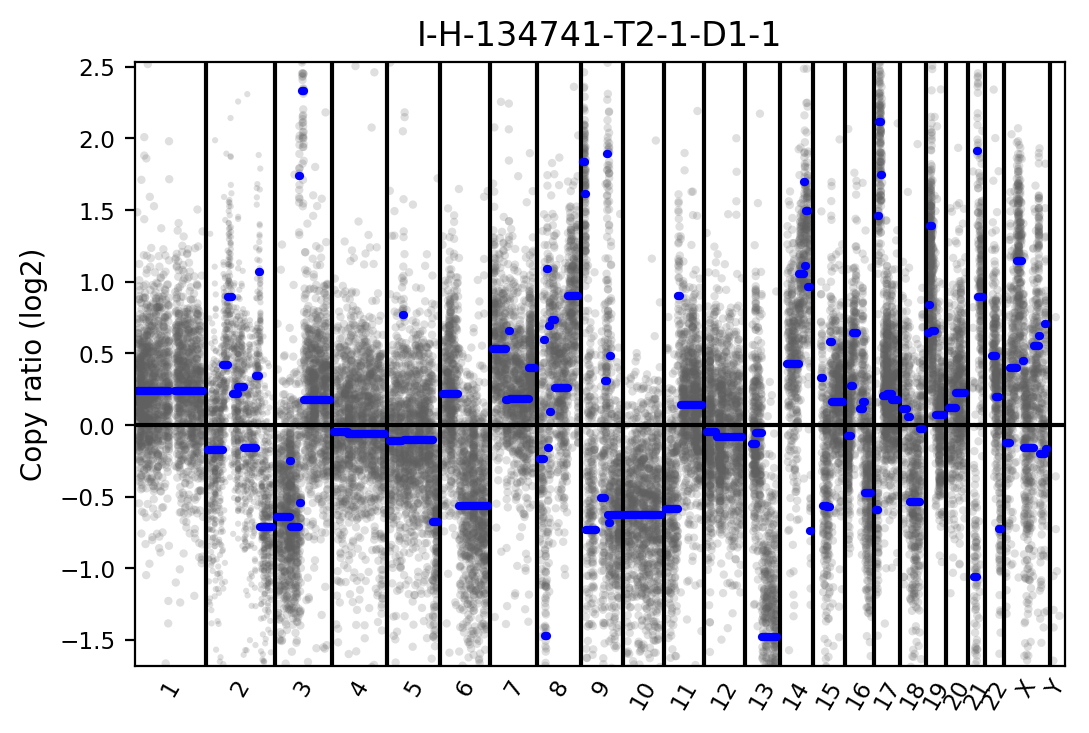

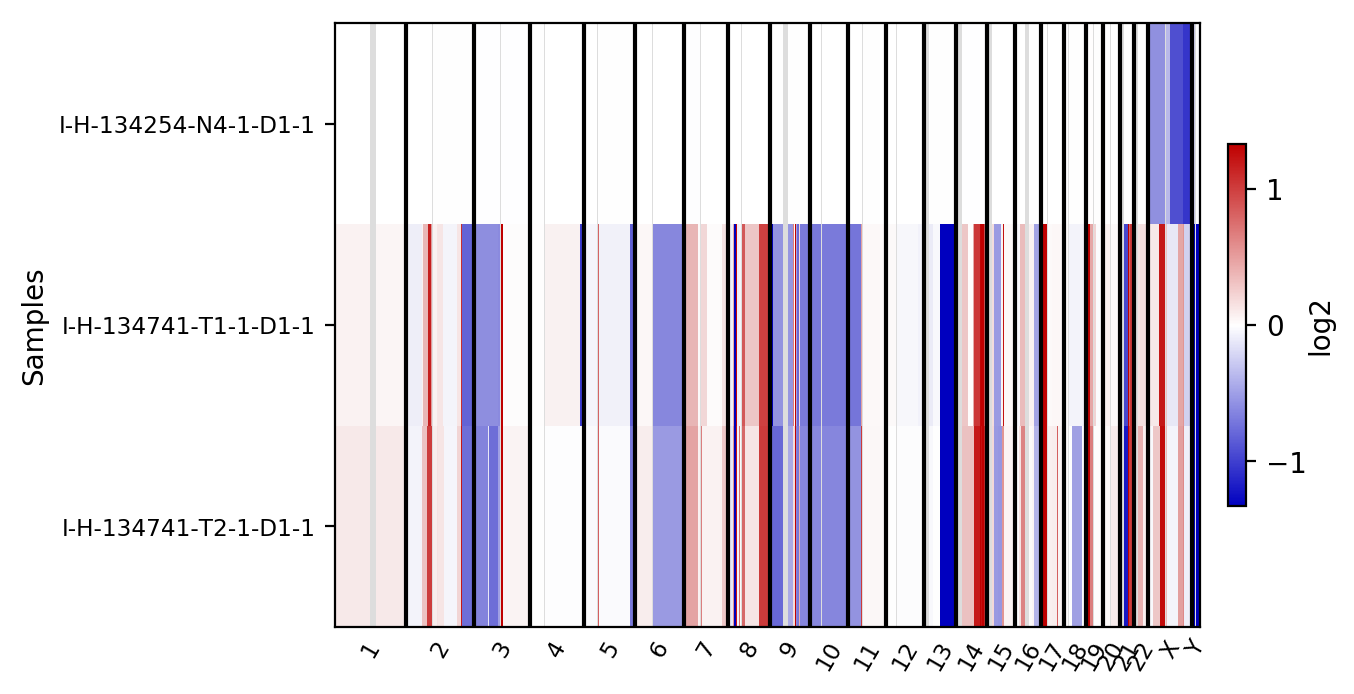

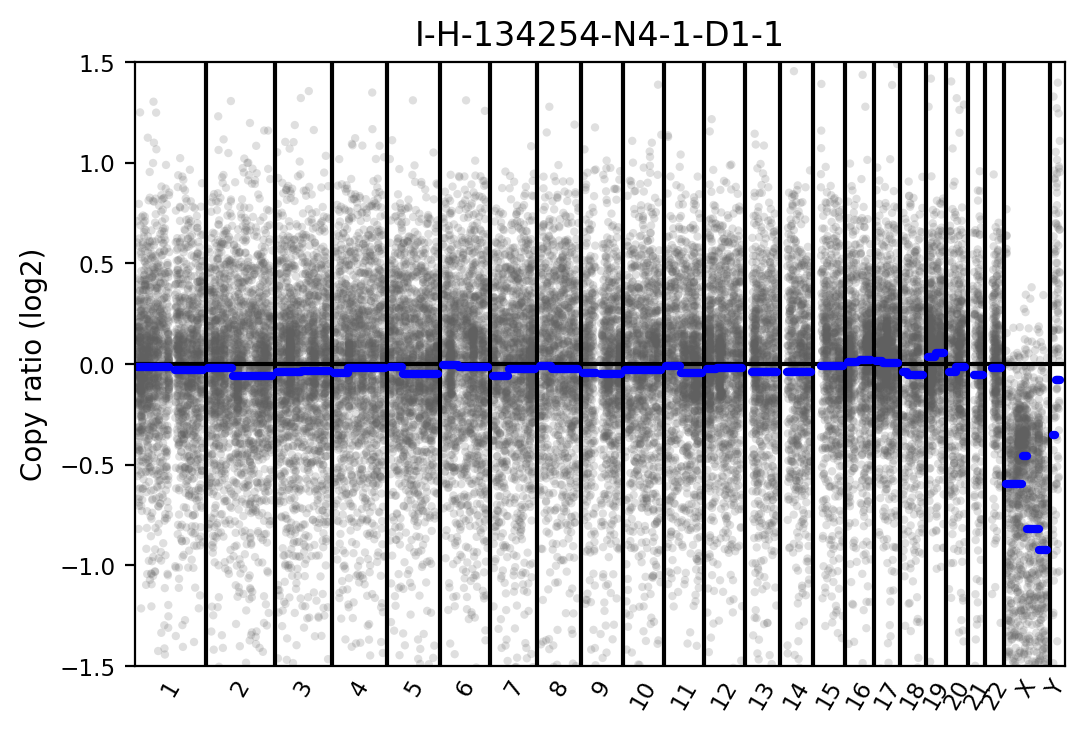

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import cnvlib
%matplotlib inline
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.dpi'] = 200
adjust = list(cnvlib.commands.do_import_theta(cnvlib.read("/ifs/res/leukgen/local/opt/leukdc/data/analyses/11/00/111100/output/I-H-134741-T1-1-D1-1.cns"), "/ifs/res/leukgen/local/opt/leukdc/data/analyses/11/00/111100/output/I-H-134741-T1-1-D1-1.n2.results"))[0]
cnvlib.do_scatter(cnvlib.read("/ifs/res/leukgen/local/opt/leukdc/data/analyses/11/01/111101/output/I-H-134741-T2-1-D1-1.cnr"),segments=cnvlib.read("/ifs/res/leukgen/local/opt/leukdc/data/analyses/11/01/111101/output/I-H-134741-T2-1-D1-1.cns"),segment_color="blue")
ax=plt.gca()
# list(cnvlib.commands.do_import_theta(cnvlib.read("/ifs/res/leukgen/local/opt/leukdc/data/analyses/11/00/111100/output/I-H-134741-T1-1-D1-1.cns"), "/ifs/res/leukgen/local/opt/leukdc/data/analyses/11/00/111100/output/I-H-134741-T1-1-D1-1.n2.results"))[0]adjust = 
cnvlib.do_heatmap([cnvlib.read("/ifs/res/leukgen/local/opt/leukdc/data/analyses/11/83/111183/output/I-H-134254-N4-1-D1-1.cns"),
                   cnvlib.read("/ifs/res/leukgen/local/opt/leukdc/data/analyses/11/00/111100/output/I-H-134741-T1-1-D1-1.cns"),
                   cnvlib.read("/ifs/res/leukgen/local/opt/leukdc/data/analyses/11/01/111101/output/I-H-134741-T2-1-D1-1.cns")], do_desaturate=True)
cnvlib.do_scatter(cnvlib.read("/ifs/res/leukgen/local/opt/leukdc/data/analyses/11/83/111183/output/I-H-134254-N4-1-D1-1.cnr"),segments=cnvlib.read("/ifs/res/leukgen/local/opt/leukdc/data/analyses/11/83/111183/output/I-H-134254-N4-1-D1-1.cns"),segment_color="blue")
col = ax.get_children()[1]
col.set_sizes([20])

0       3
1       3
2       1
3       3
4       4
5       7
6       5
7       3
8       1
9       3
10      1
11      3
12      1
13      3
14      7
15      4
16      0
17      0
18     11
19      0
20     20
21      2
22      2
23      3
24      0
25      2
26      1
27      5
28      1
29      0
       ..
108     5
109     7
110     5
111     9
112     4
113     3
114     2
115     3
116     3
117     4
118     0
119    14
120     5
121     6
122     4
123     3
124     0
125     2
126     4
127     8
128     5
129     3
130     6
131     9
132     6
133     2
134     6
135     3
136     0
137     0
Name: cn, Length: 138, dtype: int64


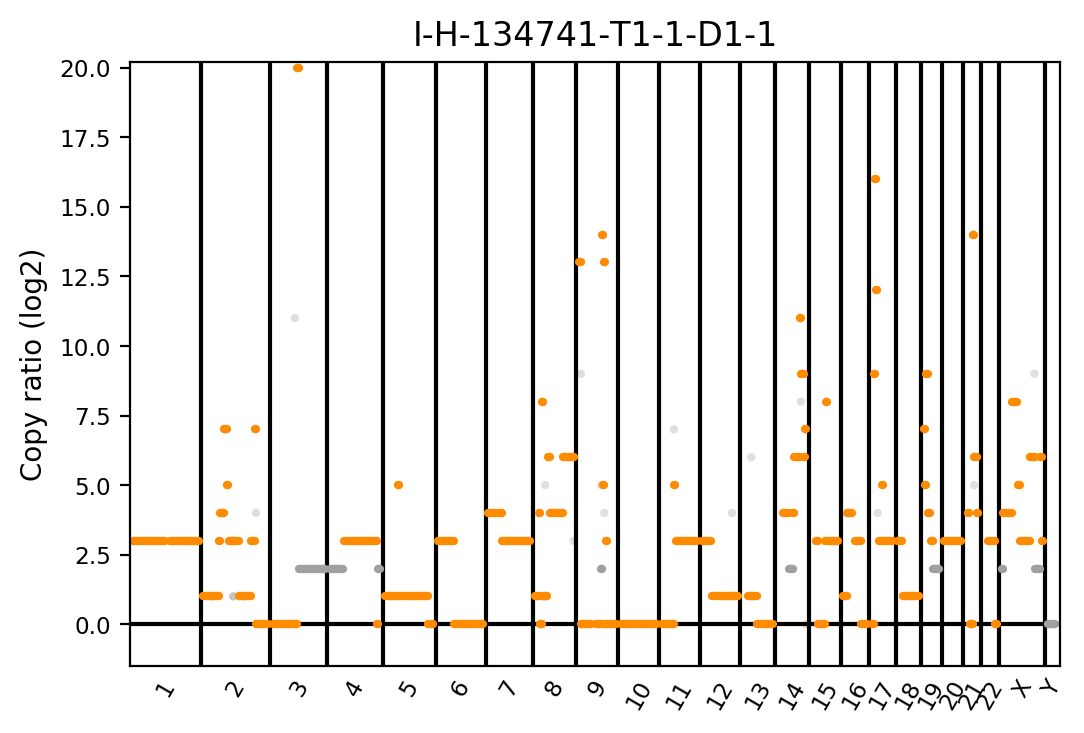

In [36]:
intCN = cnvlib.do_call(cnvlib.read("/ifs/res/leukgen/local/opt/leukdc/data/analyses/11/00/111100/output/I-H-134741-T1-1-D1-1.cns"), purity=0.454)
print(intCN.data["cn"])
intCN.data["log2"]=intCN.data["cn"]
cnvlib.do_scatter(intCN,segments=intCN)

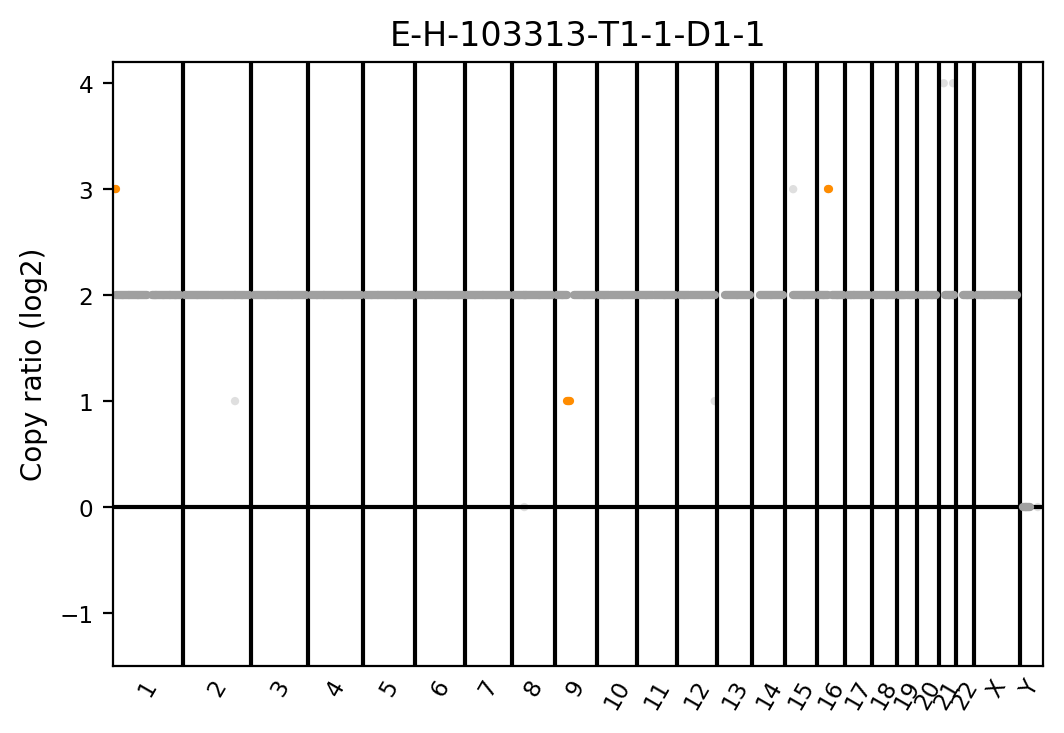

In [389]:
intCN = cnvlib.do_call(cnvlib.read("/ifs/res/leukgen/local/opt/leukdc/data/analyses/00/01/1/output/E-H-103313-T1-1-D1-1.cns"))
intCN.data["log2"]=intCN.data["cn"]
cnvlib.do_scatter(intCN,segments=intCN)

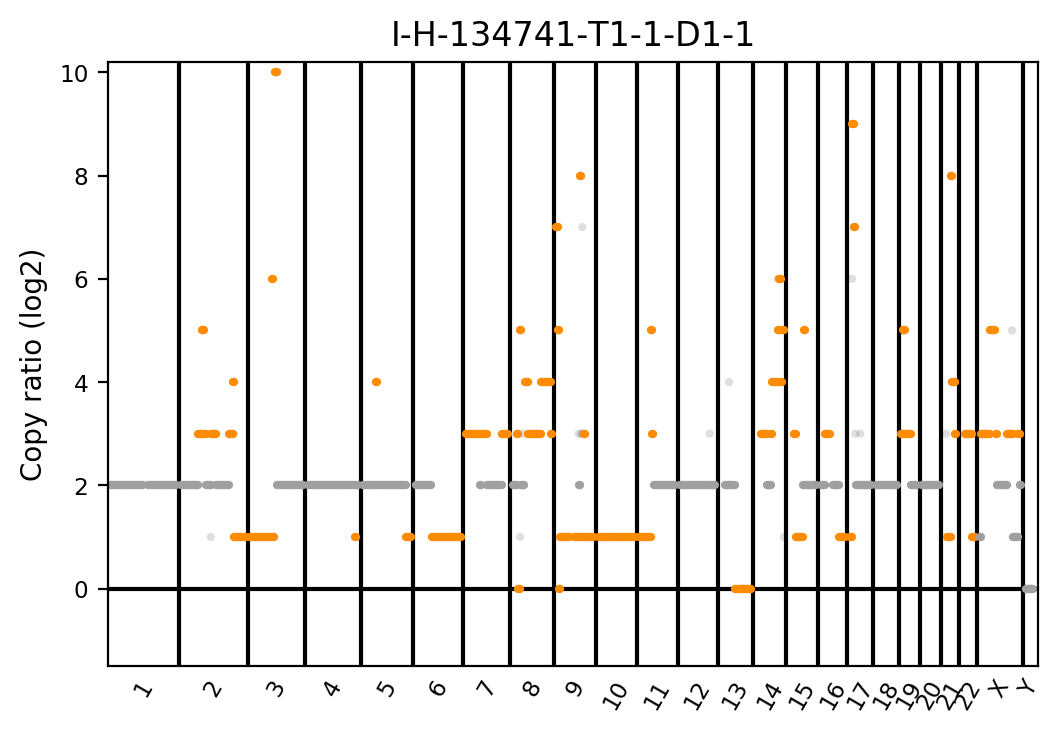

In [391]:
intCN = cnvlib.do_call(cnvlib.read("/ifs/res/leukgen/local/opt/leukdc/data/analyses/11/00/111100/output/I-H-134741-T1-1-D1-1.cns"))
intCN.data["log2"]=intCN.data["cn"]
cnvlib.do_scatter(intCN,segments=intCN)


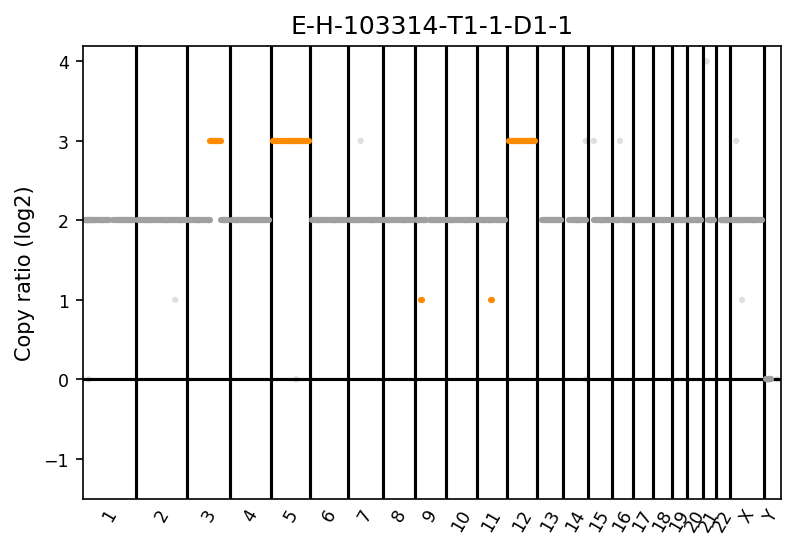

In [188]:
intCN = cnvlib.do_call(cnvlib.read("/ifs/res/leukgen/local/opt/leukdc/data/analyses/00/02/2/output/E-H-103314-T1-1-D1-1.cns"))
intCN.data["log2"]=intCN.data["cn"]
cnvlib.do_scatter(intCN,segments=intCN)
cnvplot = plt.gcf()

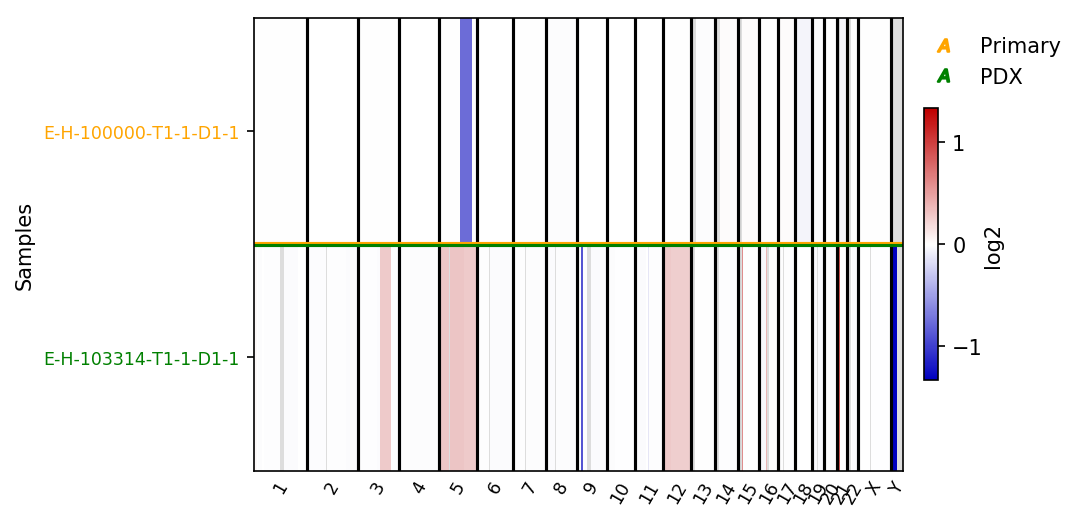

In [134]:
# cnvkit colummns: "chromosome      start   end     gene    log2    probes  weight"
# facets columns: '"chrom" "seg"   "num.mark"      "nhet"  "cnlr.median"   "mafR"  "segclust"      "cnlr.median.clust"     "mafR.clust"    "start" "end"   "cf.em" "tcn.em"        "lcn.em"'
from io import StringIO
df = pd.read_csv("E-H-100000-T1-1-D1-1_vs_I-H-100778-N1-1-D1-1_facets_output.txt", sep="\t")
df.loc[:,"gene"] = ""
df.loc[:,"weight"] = 1000
coldict = {"chrom":"chromosome","num.mark":"probes","cnlr.median.clust":"log2"}
df.rename(columns=coldict, inplace=True)
chrommap = {23:"X",24:"Y"}
df["chromosome"] = df["chromosome"].replace(chrommap)
converteddata = StringIO("test")
df[["chromosome","start","end","gene","log2","probes","weight"]].to_csv(converteddata, index=False, sep="\t")
converteddata.seek(0)
cnvdata = cnvlib.read(converteddata)
ax = cnvlib.do_heatmap([cnvdata, cnvlib.read("/ifs/res/leukgen/local/opt/leukdc/data/analyses/00/02/2/output/E-H-103314-T1-1-D1-1.cns")], do_desaturate=True)
ax.set_yticklabels(["E-H-100000-T1-1-D1-1","E-H-103314-T1-1-D1-1"]);
ax.axhline(0.995, color="orange")
ax.axhline(1.005, color="green")
for tick,col in zip (ax.get_yticklabels(), ["orange","green"]):
    tick.set_color(col)
import matplotlib.lines as mlines
text = mlines.Line2D([], [], color='orange', marker='$A$', linestyle='None', label='Primary')
text2 = mlines.Line2D([], [], color='green', marker='$A$', linestyle='None', label='PDX')
plt.legend(handles=[text,text2],bbox_to_anchor=(1, 1), loc=2, frameon=False)

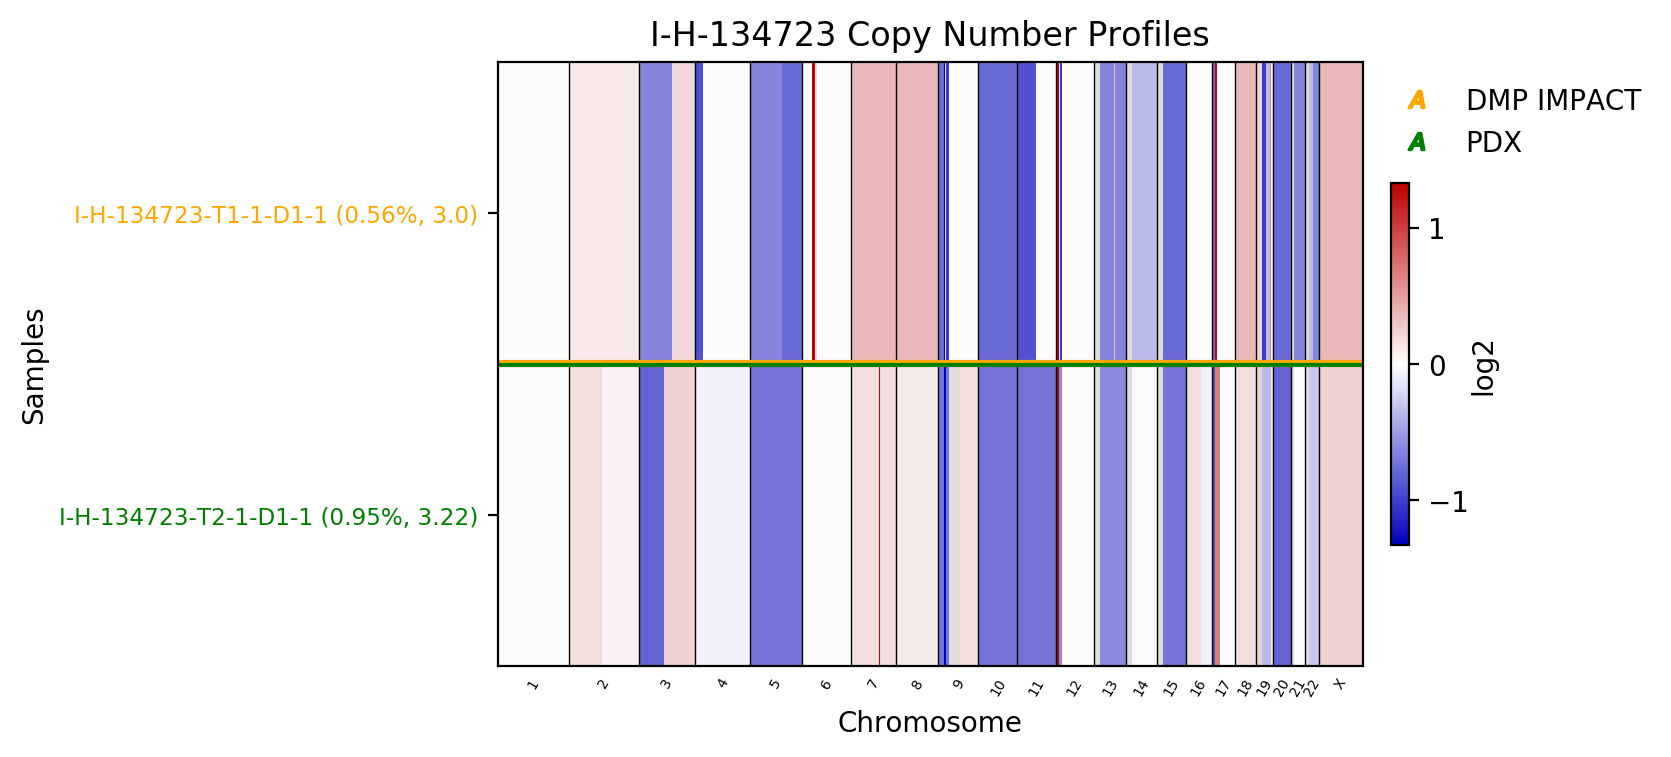

In [70]:
import leuktools as lk
from glob import glob
from io import StringIO
from os.path import join
import os
import cnvlib
import subprocess
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.dpi'] = 200
individual = "I-H-134729"
for individual in ["I-H-134723"]:
    def processfacets(sample, profile, snps):
        base = join("/home/levinem1/res/PDXdev", sample)
        os.makedirs(base, exist_ok=True)
        base = join(base, "facets")
        os.makedirs(base, exist_ok=True)
        command = [
            "Rscript", "/home/levinem1/res/PDXdev/facets.R",
            "-i", snps,
            "-o", join(base, sample + "_segments.tsv"),
            "-p", join(base, sample + "_profile.png"),
            "-s", join(base, sample + "_profile.svg"),
            "-r", join(base, sample + "_rho_psi.txt")
        ]
        if not os.path.isfile(join(base, sample + "_segments.tsv")):
            print(" ".join(command))
            subprocess.check_call(command)
        rho = pd.read_csv(join(base, sample + "_rho_psi.txt"),sep="\t")

    #     df = pd.read_csv(profile, sep="\t")
        df = pd.read_csv(join(base, sample + "_segments.tsv"), sep="\t")
        df.loc[:,"gene"] = ""
        df.loc[:,"weight"] = 1000
        coldict = {"chrom":"chromosome","num.mark":"probes","cnlr.median.clust":"log2"}
        df.rename(columns=coldict, inplace=True)
        chrommap = {23:"X",24:"Y"}
        df["log2"] = df["log2"]/rho["Purity"][0]
        df["chromosome"] = df["chromosome"].replace(chrommap)
        converteddata = StringIO()
        df[["chromosome","start","end","gene","log2","probes","weight"]].to_csv(converteddata, index=False, sep="\t")
        converteddata.seek(0)
        return [sample, converteddata, rho["Purity"][0], rho["Ploidy"][0]]

    # get workflows
    workflows = lk.get_workflows(filters=[("individual__leukid",individual),("specimen__source_type","TUMOR"),("technique__name__in","IMPACT-410,IMPACT-468")])

    primarys = []
    pdxs = []
    for workflow in workflows:
        if workflow.specimen.is_pdx == "YES":
            pdxs.append(workflow)
        else:
            primarys.append(workflow)

    # process profiles
    prouts = []
    for pr in primarys:
        facets = lk.get_analyses(filters=[("name","FACETS"),("as_target__leukid",pr.leukid)])
        facets = list(facets)[0]
        facetsout = glob(join(facets.outdir, "*facets_output.txt"))[0]
        snps = glob(join(facets.outdir, "*snp_pileup_output.txt.gz"))[0]
        prouts.append(processfacets(pr.leukid, facetsout, snps))
    pdxouts = []
    for pdx in pdxs:
        facets = list(lk.get_analyses(filters=[("name","FACETS"),("as_target__leukid",pdx.leukid)]))
        if facets:
            facets = facets[0]
            facetsout = glob(join(facets.outdir, "*facets_output.txt"))[0]
            snps = glob(join(facets.outdir, "*snp_pileup_output.txt.gz"))[0]
            pdxouts.append(processfacets(pdx.leukid, facetsout, snps))

    if len(prouts + pdxouts) < 1:
        print("NO PROFILES")
    else:
        cnvdata = [cnvlib.read(x[1]) for x in prouts + pdxouts]
        ids = [x[0]+" ("+str(round(x[2],2))+"%, "+str(round(x[3],2))+")" for x in prouts + pdxouts]
        ax = cnvlib.do_heatmap(cnvdata, do_desaturate=True)
        for line in ax.lines:
            line.set_linewidth(0.5)
        ax.set_yticklabels(ids)
        ax.set_xlabel("Chromosome")
        ax.axhline(len(prouts)-0.005, color="orange")
        ax.axhline(len(prouts)+0.005, color="green")
        for tick,col in zip (ax.get_yticklabels(), len(prouts)*["orange"] + len(pdxouts)*["green"]):
            tick.set_color(col)
        import matplotlib.lines as mlines
        handles = []
        if len(prouts) >= 1:
            handles.append(mlines.Line2D([], [], color='orange', marker='$A$', linestyle='None', label='DMP IMPACT'))
        if len(pdxouts) >= 1:
            handles.append(mlines.Line2D([], [], color='green', marker='$A$', linestyle='None', label='PDX'))
        plt.legend(handles=handles,bbox_to_anchor=(1, 1), loc=2, frameon=False)
        ax.tick_params(axis='x', which='major', labelsize=5)
        plt.title(individual + " Copy Number Profiles")
#     cbar = plt.gcf().axes[1]
#     box = cbar.get_position()
#     cbar.set_position([1, box.y0, box.width, box.height])
#     ax_p = ax.twinx()
#     ax_p.invert_yaxis()
#     ax_p.set_yticks(ax.get_yticks())
#     ax_p.set_yticklabels(ax.get_yticklabels())
# print(prouts)

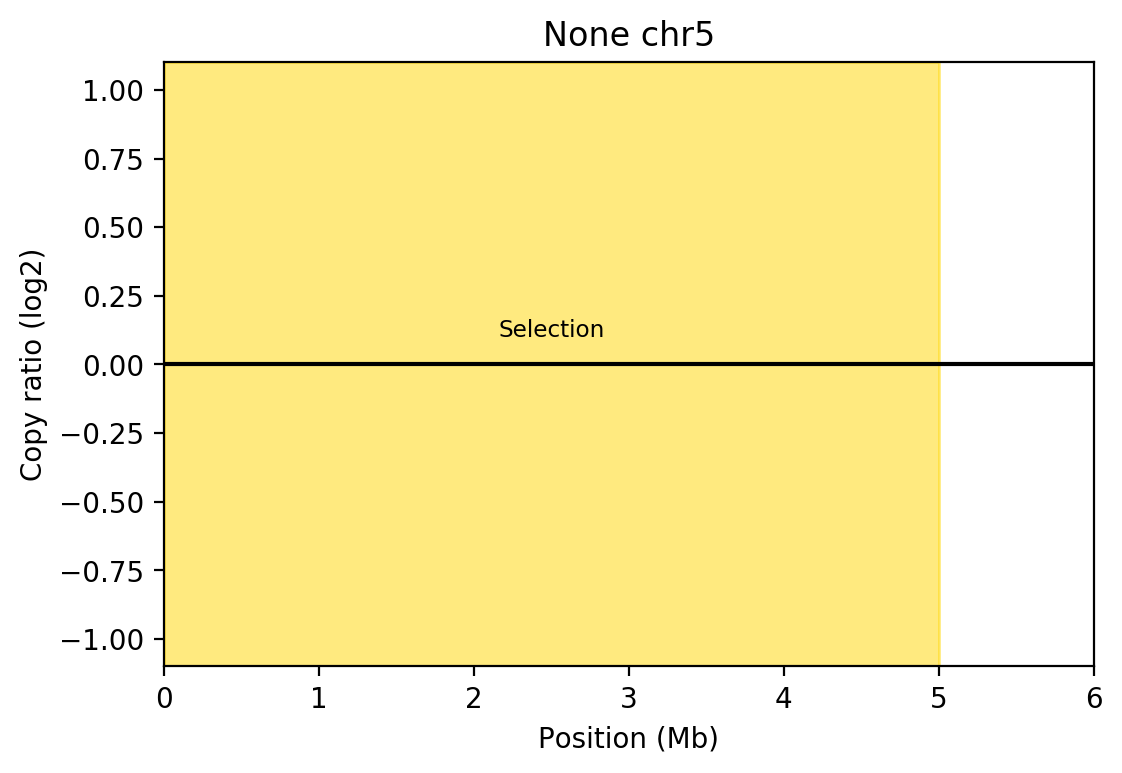

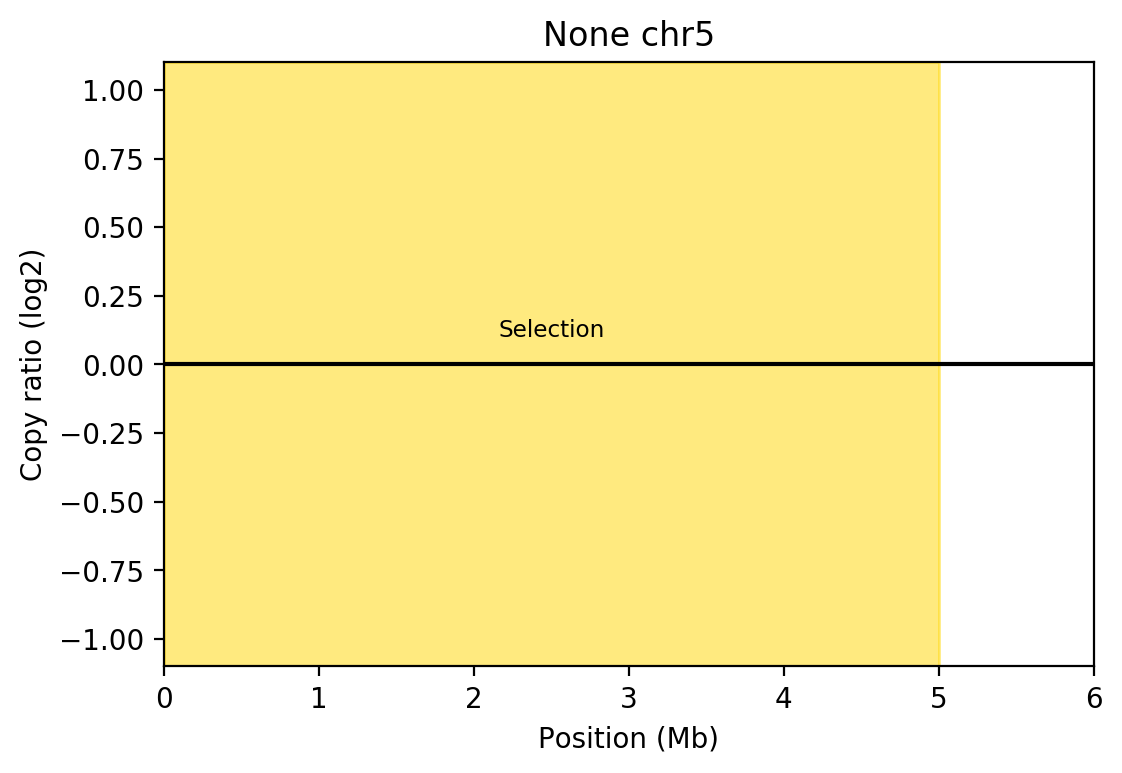

In [44]:
for cnv in cnvdata:
    cnvlib.do_scatter(cnv,segments=cnv,show_range="chr5:0-5000000")

In [147]:
from mergesvvcf import mergedfile

In [149]:
?mergedfile.merge()

Signature: mergedfile.merge(filenames, programs, forceSV, outfile, slop=0, verbose=True, output_ncallers=False, min_num_callers=0, filterByChromosome=True, noFilter=False, debug=False)
Docstring: Merge several VCFs from different programs into a new VCF file.
File:      /ifs/work/leukgen/home/mflevine/repos/mergeSVvcf/mergesvvcf/mergedfile.py
Type:      function


In [234]:
p100_good_norms=[
"I-H-100520-N1-1-D1-1",
"I-H-100521-N1-1-D1-1",
"I-H-100523-N1-1-D1-1",
"I-H-100524-N1-1-D1-1",
"I-H-100525-N1-1-D1-1",
"I-H-100526-N1-1-D1-1",
"I-H-100527-N1-1-D1-1",
"I-H-100530-N1-1-D1-1",
"I-H-100532-N1-1-D1-1",
"I-H-100534-N1-1-D1-1",
"I-H-100536-N1-1-D1-1",
"I-H-100537-N1-1-D1-1",
"I-H-100538-N1-1-D1-1",
"I-H-100539-N1-1-D1-1",
"I-H-100540-N1-1-D1-1",
"I-H-100542-N1-1-D1-1",
"I-H-100543-N1-1-D1-1",
"I-H-100544-N1-1-D1-1"]
p100_good_norms = [x[:10] for x in p100_good_norms]
h4 = list(lk.get_workflows(filters=[("individual__leukid__in", ",".join(p100_good_norms)),("technique__name","HEMEPACT-V4")]))
h4 = [w.pk for w in h4]
# " -r ".join(sorted(h4))
h4

[36540,
 36541,
 36542,
 39671,
 39672,
 39673,
 39674,
 39675,
 39676,
 39677,
 39678,
 39679,
 39680,
 39681,
 39682,
 39683,
 39684,
 39685,
 39686]

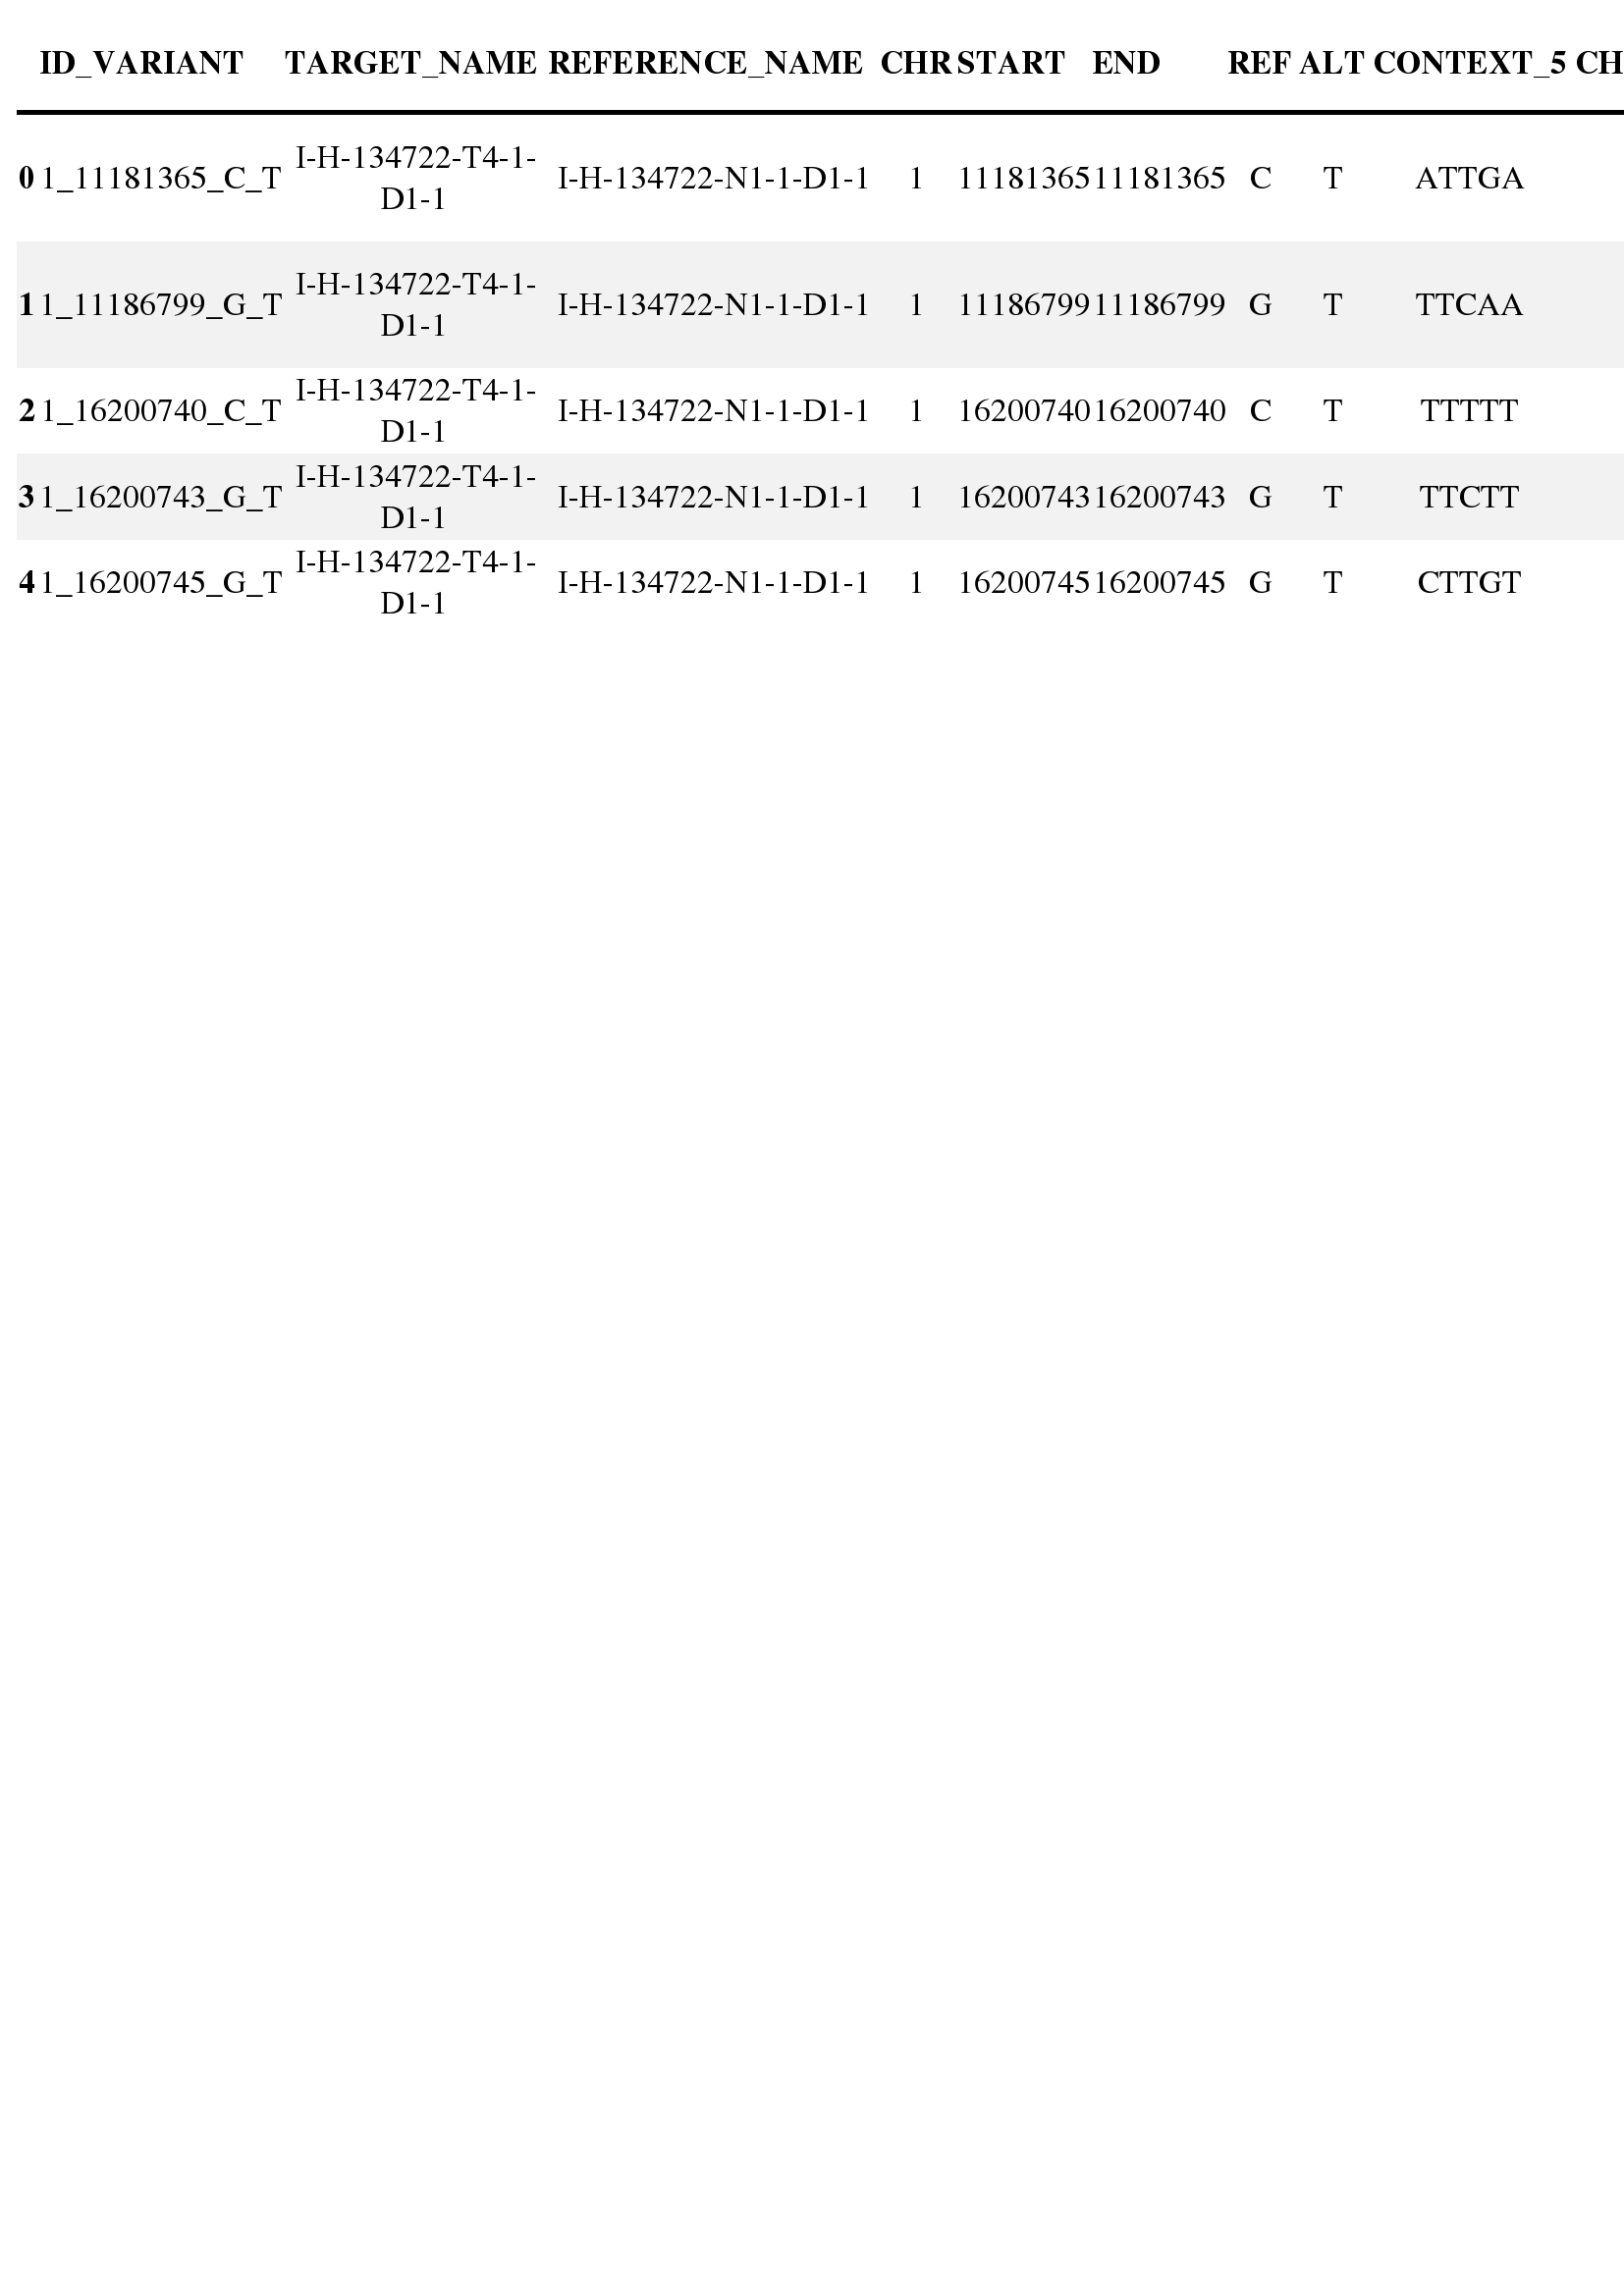

In [259]:
from weasyprint import HTML, CSS
style = CSS(string="""
@page{
    margin: 0 0 0 0;
}

table {
    position:fixed;
    border-collapse: collapse;
    width: 100%;
    height: 100%;
}
tr {
    text-align: center;
}
th {
    text-align: left;
}

thead {
    border-bottom: 2px solid #000;
}

tbody > tr:nth-child(even) {background-color: #f2f2f2;}""")
html = allcalls.head().to_html()
HTML(string=html).write_png("table2.png",stylesheets=[style],resolution=200)
from IPython.display import Image,display
display(Image("table2.png"))

In [361]:
import pysam
vcf = pysam.VariantFile("/home/levinem1/res/SVBench/I-H-108299-T1-1-D1-1/new_smoove/I-H-108299-T1-1-D1-1-smoove.genotyped.annotated.vcf")
count = 0
somatic = []
scores = []
for rec in vcf.fetch():
    count+=1
    if int(rec.samples.get(0).get("SHQ")) > 1 and (int(rec.samples.get(0).get("SHQ")) > int(rec.samples.get(1).get("SHQ"))):
        somatic.append(rec)
        scores.append([int(rec.samples.get(0).get("SHQ")),int(rec.samples.get(1).get("SHQ"))])
print(count)
print(len(somatic))

10234
684


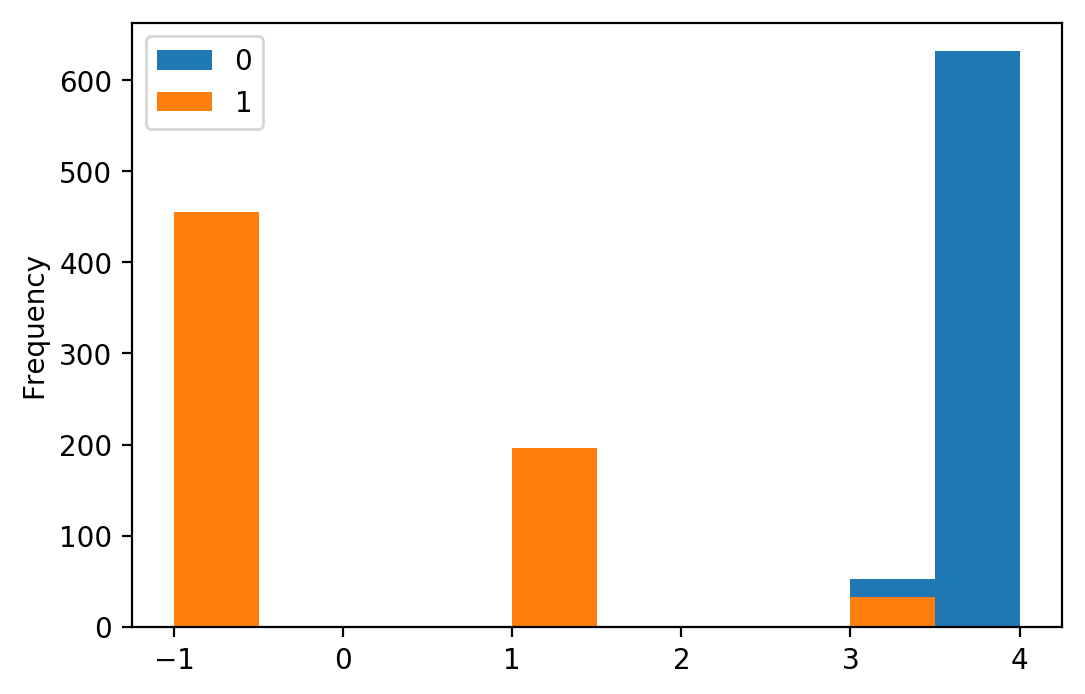

In [362]:
pd.DataFrame(scores).plot.hist()

In [59]:
from bs4 import BeautifulSoup
file = open("ExpandedGenomicsAug16.html")
soup = BeautifulSoup(file, 'html.parser')
clean = soup
for div in soup.find_all("div", {'class':'input'}): 
    div.decompose()
file.close()
with open("ExpandedGenomicsAug16.html", "w") as file:
    file.write(str(clean))
css ='''<script src="http://ajax.googleapis.com/ajax/libs/jquery/1.7.1/jquery.min.js" type="text/javascript"></script>
<script>
$(document).ready(function () {
  $(".input").remove()
});
</script>
<style>
img {
    display: block;
    margin-left: auto;
    margin-right: auto;
    width: 60%;
}
body {
    background-color: #F8F8F8;
}
table {
    margin:auto;
    border: 1px solid black;
    border-collapse: collapse;
}
th {
    border: 0px solid black;
    margin: 10 px
    padding: 10px 40px;
    padding-left: 10px;
    background: #DCDCDC;
}
td {
    padding-top: 10px;
    padding-left: 10px;
    border: 0px solid black;
}
tr { 
  border: solid;
  border-width: 1px 0;
}
</style>'''
with open("ExpandedGenomicsAug16.html", 'r+') as f:
    file_data = f.read()
    f.seek(0, 0)
    f.write(css)

Computing t-SNE embedding


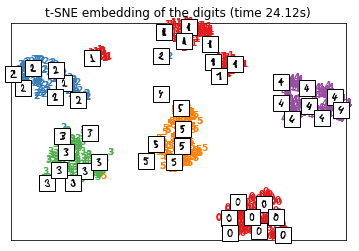

Computing t-SNE PCA embedding


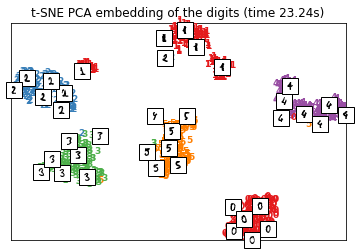

In [22]:
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
%matplotlib inline
# digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape

#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plt.show()

# t-SNE PCA embedding of the digits dataset
print("Computing t-SNE PCA embedding")
pca = decomposition.TruncatedSVD(n_components=10)
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_pca = pca.fit_transform(X)
X_tsnepca = tsne.fit_transform(X_pca)

plot_embedding(X_tsnepca,
               "t-SNE PCA embedding of the digits (time %.2fs)" %
               (time() - t0))

plt.show()

In [26]:
sum(pca.explained_variance_ratio_ )

0.7724498562717589

In [27]:
n_features

64

In [28]:
import pandas as pd

In [29]:
%%time
treehouse = []
print("Reading")
chunks = pd.read_csv(
    "/ifs/res/leukgen/home/levinem1/Treehouse/TreehousePEDv8_unique_hugo_log2_tpm_plus_1.2018-07-25.tsv",
    chunksize=20000,
    sep="\t",
    comment="#")
print("Loop through Chunks")
for i in chunks:
    treehouse.append(i)
print("Concat")
treehouse = pd.concat(treehouse)

Reading
Loop through Chunks
Concat
CPU times: user 2min 23s, sys: 12min 52s, total: 15min 15s
Wall time: 34min 37s


In [32]:
treehouse_T = treehouse.T
treehouse_T.head()

0          1          2        3         4          5      \
Gene            5S_rRNA  5_8S_rRNA        7SK     A1BG  A1BG-AS1       A1CF   
THR15_0330_S01        0          0          0  2.61824   1.15056          0   
THR29_0776_S01        0          0  0.0840643  5.01614   2.33056          0   
THR14_1221_S01        0          0   0.831877  1.87971    1.4489  0.0143553   
THR11_0247_S01        0          0    1.55582  3.21412   3.26003   0.189034   

                  6         7          8          9         ...         58571  \
Gene                A2M   A2M-AS1      A2ML1  A2ML1-AS1     ...      snoU2-30   
THR15_0330_S01   7.2115  0.321928          0          0     ...             0   
THR29_0776_S01  5.32481  0.948601  0.0565835          0     ...             0   
THR14_1221_S01  4.87431  0.321928   0.485427          0     ...             0   
THR11_0247_S01  8.86638   1.03562   0.298658          0     ...             0   

                   58572    58573    58574    58575   58576  58577     58578  \
Gene            snoU2_19  snoU83B  snoZ196  snoZ278  snoZ40  snoZ6  snosnR66   
THR15_0330_S01         0        0        0        0       0      0         0   
THR29_0776_S01         0        0        0        0       0      0         0   
THR14_1221_S01         0        0        0        0       0      0         0   
THR11_0247_S01         0        0        0        0       0      0         0   

                  58579       58580  
Gene             uc_338  yR211F11.2  
THR15_0330_S01  1.80735           0  
THR29_0776_S01  2.69377           0  
THR14_1221_S01  2.17313    0.201634  
THR11_0247_S01  3.63227           0  

[5 rows x 58581 columns]

In [33]:
treehouse_T.columns = treehouse_T.iloc[0]
treehouse_T.head()

Gene            5S_rRNA  5_8S_rRNA        7SK     A1BG  A1BG-AS1       A1CF  \
Gene            5S_rRNA  5_8S_rRNA        7SK     A1BG  A1BG-AS1       A1CF   
THR15_0330_S01        0          0          0  2.61824   1.15056          0   
THR29_0776_S01        0          0  0.0840643  5.01614   2.33056          0   
THR14_1221_S01        0          0   0.831877  1.87971    1.4489  0.0143553   
THR11_0247_S01        0          0    1.55582  3.21412   3.26003   0.189034   

Gene                A2M   A2M-AS1      A2ML1  A2ML1-AS1     ...      snoU2-30  \
Gene                A2M   A2M-AS1      A2ML1  A2ML1-AS1     ...      snoU2-30   
THR15_0330_S01   7.2115  0.321928          0          0     ...             0   
THR29_0776_S01  5.32481  0.948601  0.0565835          0     ...             0   
THR14_1221_S01  4.87431  0.321928   0.485427          0     ...             0   
THR11_0247_S01  8.86638   1.03562   0.298658          0     ...             0   

Gene            snoU2_19  snoU83B  snoZ196  snoZ278  snoZ40  snoZ6  snosnR66  \
Gene            snoU2_19  snoU83B  snoZ196  snoZ278  snoZ40  snoZ6  snosnR66   
THR15_0330_S01         0        0        0        0       0      0         0   
THR29_0776_S01         0        0        0        0       0      0         0   
THR14_1221_S01         0        0        0        0       0      0         0   
THR11_0247_S01         0        0        0        0       0      0         0   

Gene             uc_338  yR211F11.2  
Gene             uc_338  yR211F11.2  
THR15_0330_S01  1.80735           0  
THR29_0776_S01  2.69377           0  
THR14_1221_S01  2.17313    0.201634  
THR11_0247_S01  3.63227           0  

[5 rows x 58581 columns]

In [37]:
treehouse_T = treehouse_T.iloc[1:]
treehouse_T.head()

Gene           5S_rRNA 5_8S_rRNA        7SK     A1BG A1BG-AS1       A1CF  \
THR15_0330_S01       0         0          0  2.61824  1.15056          0   
THR29_0776_S01       0         0  0.0840643  5.01614  2.33056          0   
THR14_1221_S01       0         0   0.831877  1.87971   1.4489  0.0143553   
THR11_0247_S01       0         0    1.55582  3.21412  3.26003   0.189034   
THR08_0162_S01       0         0          0  4.20085  4.51728          0   

Gene                 A2M   A2M-AS1      A2ML1 A2ML1-AS1    ...     snoU2-30  \
THR15_0330_S01    7.2115  0.321928          0         0    ...            0   
THR29_0776_S01   5.32481  0.948601  0.0565835         0    ...            0   
THR14_1221_S01   4.87431  0.321928   0.485427         0    ...            0   
THR11_0247_S01   8.86638   1.03562   0.298658         0    ...            0   
THR08_0162_S01  0.790772  0.163499   0.189034         0    ...            0   

Gene           snoU2_19 snoU83B snoZ196 snoZ278 snoZ40 snoZ6 snosnR66  \
THR15_0330_S01        0       0       0       0      0     0        0   
THR29_0776_S01        0       0       0       0      0     0        0   
THR14_1221_S01        0       0       0       0      0     0        0   
THR11_0247_S01        0       0       0       0      0     0        0   
THR08_0162_S01        0       0       0       0      0     0        0   

Gene             uc_338 yR211F11.2  
THR15_0330_S01  1.80735          0  
THR29_0776_S01  2.69377          0  
THR14_1221_S01  2.17313   0.201634  
THR11_0247_S01  3.63227          0  
THR08_0162_S01  5.66903          0  

[5 rows x 58581 columns]

In [43]:
%%time
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
treehouse_pca = pca.fit_transform(treehouse_T)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.11946375 0.10362934 0.06797715 0.04435474 0.03531654 0.02973963
 0.02682721 0.02369661 0.02177727 0.02093242 0.01673403 0.01545571
 0.01359465 0.01288405 0.01178745 0.01121214 0.00965306 0.00802609
 0.00734796 0.00590886 0.00561207 0.00532772 0.00496798 0.0048947
 0.00461413 0.00439311 0.00429077 0.00400786 0.00390073 0.00359654
 0.00347191 0.00331955 0.0032189  0.00294241 0.00289668 0.00276212
 0.00263627 0.00255495 0.00246649 0.00241813 0.00231735 0.00222986
 0.00216299 0.00204413 0.00198335 0.00190256 0.00185851 0.00178692
 0.00171721 0.00168324]
0.7002977730043246
CPU times: user 1min 21s, sys: 9min 57s, total: 11min 19s
Wall time: 31min 38s


In [45]:
%%time
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0, verbose=1)
treehouse_tsnepca = tsne.fit_transform(treehouse_pca)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 11427 samples in 0.038s...
[t-SNE] Computed neighbors for 11427 samples in 9.985s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11427
[t-SNE] Computed conditional probabilities for sample 2000 / 11427
[t-SNE] Computed conditional probabilities for sample 3000 / 11427
[t-SNE] Computed conditional probabilities for sample 4000 / 11427
[t-SNE] Computed conditional probabilities for sample 5000 / 11427
[t-SNE] Computed conditional probabilities for sample 6000 / 11427
[t-SNE] Computed conditional probabilities for sample 7000 / 11427
[t-SNE] Computed conditional probabilities for sample 8000 / 11427
[t-SNE] Computed conditional probabilities for sample 9000 / 11427
[t-SNE] Computed conditional probabilities for sample 10000 / 11427
[t-SNE] Computed conditional probabilities for sample 11000 / 11427
[t-SNE] Computed conditional probabilities for sample 11427 / 11427
[t-SNE] Mean sigma: 21.005516
[t-SNE] KL divergenc

In [66]:
treehouse_meta = pd.read_csv("/ifs/res/leukgen/home/levinem1/Treehouse/TreehousePEDv8_clinical_metadata.2018-07-25.tsv",sep="\t").set_index("th_sampleid")
treehouse_meta = treehouse_meta.loc[treehouse_T.index]
treehouse_meta.head()

disease  age_at_dx               pedaya  \
THR15_0330_S01                  osteosarcoma        NaN  Yes, age < 30 years   
THR29_0776_S01              rhabdomyosarcoma       20.0  Yes, age < 30 years   
THR14_1221_S01                    ependymoma       11.5  Yes, age < 30 years   
THR11_0247_S01                        glioma       13.0  Yes, age < 30 years   
THR08_0162_S01  acute lymphoblastic leukemia        0.6  Yes, age < 30 years   

                 gender  
THR15_0330_S01   female  
THR29_0776_S01     male  
THR14_1221_S01     male  
THR11_0247_S01     male  
THR08_0162_S01  unknown

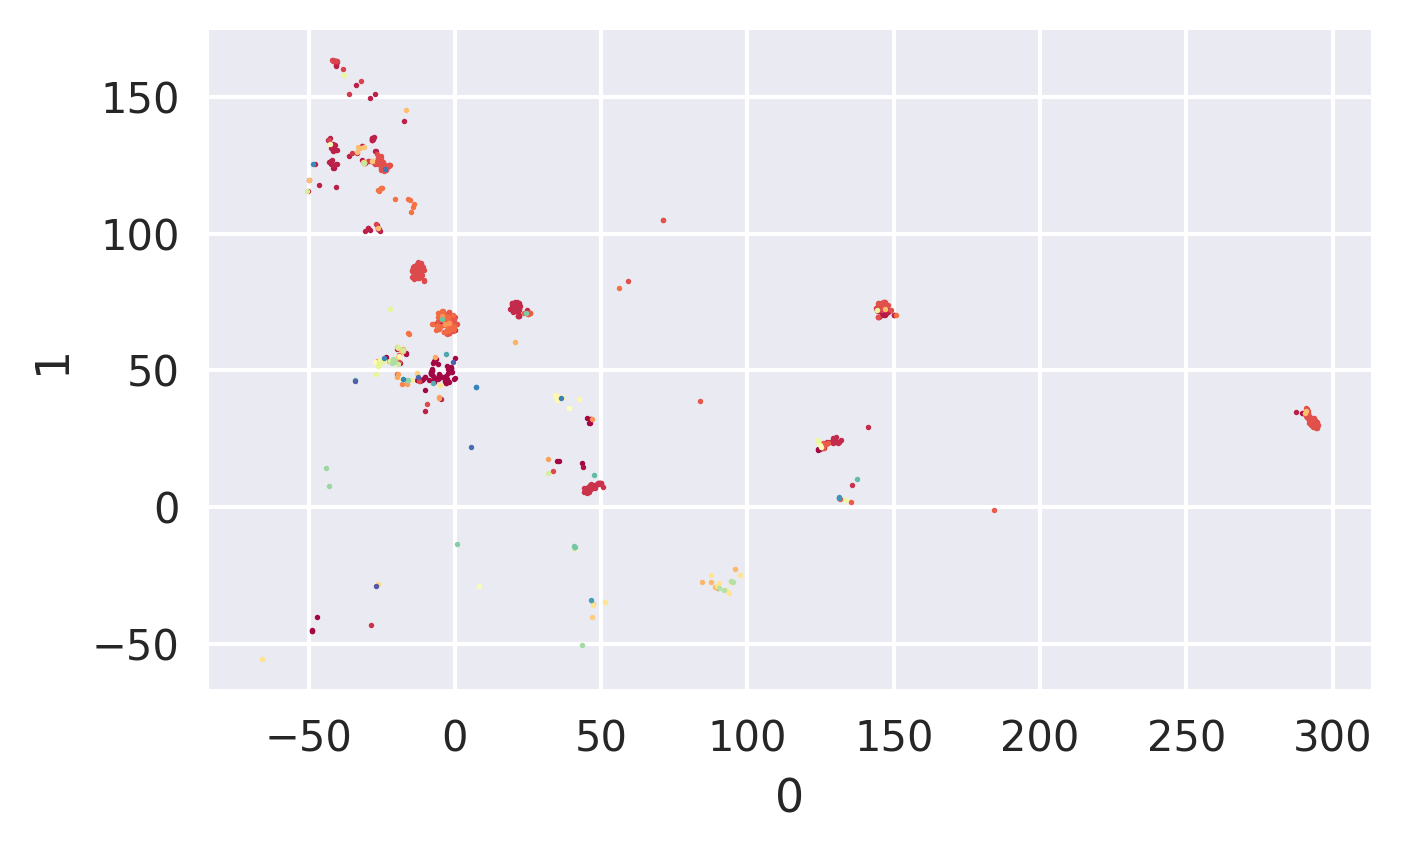

In [108]:
import seaborn as sns
sns.set()
plt.rcParams["figure.dpi"]=300
th_tsnepca_df = pd.DataFrame(treehouse_tsnepca)
th_tsnepca_df.index = treehouse_T.index
th_tsnepca_df = th_tsnepca_df.join(treehouse_meta)
th_tsnepca_df["batch"] = th_tsnepca_df.index.str[:2]
# th_tsnepca_df.plot(kind='scatter',x=0,y=1,s=1,c=3)
fg = sns.FacetGrid(data=th_tsnepca_df[th_tsnepca_df["batch"]=="TH"], hue='disease', aspect=1.61, palette="Spectral")
fg.map(plt.scatter, 0, 1, s=1)

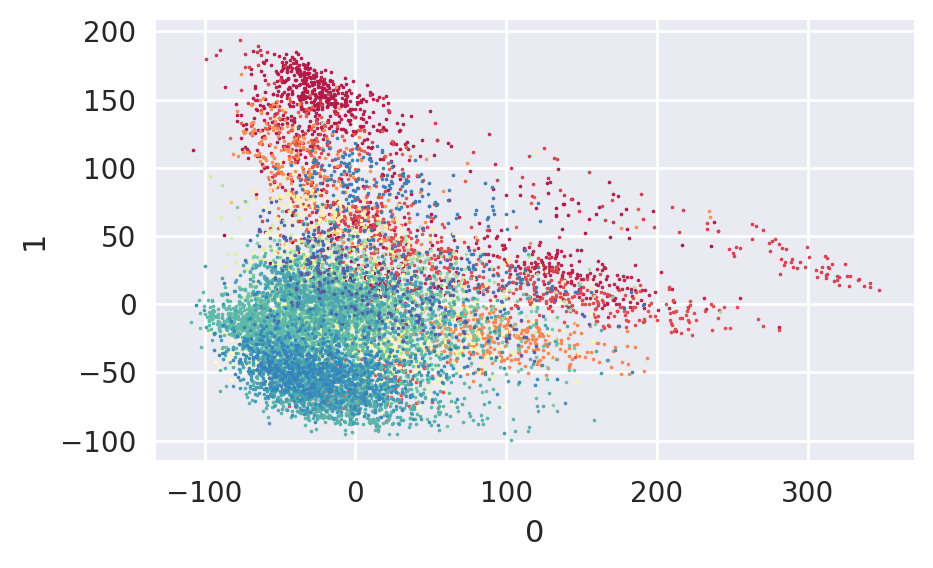

In [83]:
th_pca_df = pd.DataFrame(treehouse_pca)
th_pca_df.index = treehouse_T.index
th_pca_df = th_pca_df.join(treehouse_meta)
# th_tsnepca_df.plot(kind='scatter',x=0,y=1,s=1,c=3)
fg = sns.FacetGrid(data=th_pca_df, hue='disease', aspect=1.61, palette="Spectral")
fg.map(plt.scatter, 0, 1, s=1)

In [106]:
th_tsnepca_df[th_tsnepca_df["pedaya"]=="Yes, age < 30 years"].groupby(["batch"]).count()["pedaya"]

batch
TA    784
TC    366
TH    784
Name: pedaya, dtype: int64

In [148]:
th_tsnepca_df

0           1  \
THR15_0330_S01             46.448627   32.167984   
THR29_0776_S01             -2.479917   64.222420   
THR14_1221_S01            147.348511   71.070137   
THR11_0247_S01            -49.730373  119.576302   
THR08_0162_S01             21.766834   74.726524   
TH27_1241_S01             -27.838614  126.467476   
THR22_0588_S01             44.665234    5.843268   
TARGET-40-0A4I65-01A-01R   -3.594710   50.145916   
THR14_1185_S01            147.512558   72.400429   
THR09_0563_S01             49.894657    8.581702   
THR11_0259_S01            -31.980665  155.984772   
THR19_0459_S01            -28.338121  134.458237   
THR30_0851_S01            -13.344042   86.480759   
THR14_1182_S01            145.338303   73.726212   
THR29_0787_S01             -1.997473   70.288147   
THR08_0162_S02             20.303776   72.540092   
THR08_0216_S01             24.980755   70.678696   
THR09_0561_S01             49.987976    8.602294   
THR19_0440_S01            -17.418741  141.393585   
TH34_1179_S01             -24.307045   54.307625   
THR08_0193_S01             20.410275   74.429245   
THR25_0640_S01             -5.308847   47.259796   
THR14_1212_S01            146.794434   70.461067   
THR29_0767_S01             -4.188288   71.756653   
THR13_0963_S01             -4.884782   39.578094   
TH06_0284_S01             -15.073117  108.024780   
TH27_0702_S01              -7.623366   67.130974   
THR30_0858_S01            -13.407204   85.392944   
TH06_1175_S01             -33.564842  129.430145   
THR20_0501_S01            292.700958   31.854910   
...                              ...         ...   
TCGA-AN-A0XT-01           -76.155624  -14.347166   
TCGA-TS-A8AS-01             1.316572   -2.544014   
TCGA-QR-A70C-01            12.305842   95.340508   
TCGA-OR-A5JS-01            38.138687   39.823704   
TCGA-EE-A29L-06            15.544636   35.955048   
TCGA-44-2659-01           -29.868469  -42.430687   
TCGA-4X-A9F9-01            64.452660    0.299094   
TCGA-C5-A1BJ-01           -29.667528  -88.021858   
TCGA-G2-AA3C-01            33.397514   16.014997   
TCGA-HU-8602-01           -12.973017  -56.759296   
TCGA-CR-6470-01           -33.114403  -96.353348   
TCGA-CH-5768-01           -30.490538    2.765074   
TCGA-2H-A9GM-01           -22.621675  -62.419102   
TCGA-XH-A853-01            24.625933   52.817799   
TCGA-CM-4751-01             9.756894  -75.544571   
TCGA-AO-A0J4-01           -51.556511  -27.192120   
TCGA-78-7160-01           -42.464031  -47.769501   
TCGA-77-6844-01           -52.304592  -75.445114   
TCGA-CS-4944-01           -18.646698  144.121918   
TCGA-A2-A0YK-01           -88.763954  -19.167225   
TCGA-18-3414-01           -51.778973  -77.122864   
TCGA-13-1481-01             7.905128  -21.326477   
TCGA-BP-4803-01           -26.465317   22.108826   
TCGA-A8-A09K-01           -76.025192    1.515234   
TCGA-61-1907-01             5.069304  -22.463322   
TCGA-IB-7885-01           -82.149818  -62.934284   
TCGA-95-7947-01           -38.726036  -52.543461   
TCGA-VQ-AA6F-01            -8.415807  -56.129765   
TCGA-BR-8588-01            -6.121958  -56.147381   
TCGA-DD-A115-01            91.263771  -24.152649   

                                                                    disease  \
THR15_0330_S01                                                 osteosarcoma   
THR29_0776_S01                                             rhabdomyosarcoma   
THR14_1221_S01                                                   ependymoma   
THR11_0247_S01                                                       glioma   
THR08_0162_S01                                 acute lymphoblastic leukemia   
TH27_1241_S01                                                        glioma   
THR22_0588_S01                                                     lymphoma   
TARGET-40-0A4I65-01A-01R                                       osteosarcoma   
THR14_1185_S01            supratentorial or spinal cord primitive neural...   
THR09_0563_S01      

In [401]:
from bokeh.plotting import figure, show,output_notebook,output_file,reset_output
from bokeh.models.tools import HoverTool
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral
from bokeh.transform import transform
from bokeh.resources import CDN
from bokeh.embed import file_html
from IPython.core.display import HTML
# output_notebook()
reset_output()
# output_file("tsne.html")
source = ColumnDataSource(th_tsnepca_df.rename(columns={0:"x",1:"y"}).sort_values("disease"))
colors = sns.color_palette("Spectral", n_colors=len(th_tsnepca_df["disease"].dropna().unique())).as_hex()
colormap = dict(zip(sorted(th_tsnepca_df["disease"].dropna().unique()),colors))
plot = figure(plot_width=1000,tools="pan,box_zoom,save,reset",title="Treehouse RNA TSNE (PCA 50)",title_location="above")
plot.circle(x="x", y="y", 
         source=source, 
         size=10,color=factor_cmap('disease', palette=list(colormap.values()), factors=list(colormap.keys())),
         legend="disease")
hover = HoverTool()
hover.tooltips=[
    ('Disease', '@disease'),
    ('Batch','@batch'),
    ('Age at Diagnosis', '@age_at_dx')
]
legend = plot.legend[0]
legend.plot = None
legend.label_text_font_size = "6pt"
legend.spacing = -15
legend.location = "center"
# legend.glyph_height = 10
# legend.glyph_width = 10
plot.add_layout(legend, 'right')
plot.add_tools(hover)
plot.toolbar.logo = None
# show(plot)
html = file_html(plot, CDN, "tsne plot")
HTML(html)
# with open("tsne.html","w") as file:
#     file.write(html)

In [280]:
legend.plot = None

In [248]:
4

4

In [212]:
list(colormap.keys())[37]

nan

In [219]:
" ".join(['python2', '/ifs/work/leukgen/opt/conpair/0.1/scripts/run_gatk_pileup_for_sample.py', '--reference', '/ifs/work/leukgen/ref/homo_sapiens/GRCh37d5/genome/gr37.fasta', '--markers', '/ifs/work/leukgen/opt/conpair/0.1/data/markers/GRCh37.autosomes.phase3_shapeit2_mvncall_integrated.20130502.SNV.genotype.sselect_v4_MAF_0.4_LD_0.8.bed', '--bam', '/ifs/res/leukgen/local/opt/leukdc/data/workflows/42/50/44250/data/bam/I-H-135062-T1-1-D1-1.bam', '--outfile', '/ifs/work/leukgen/local/opt/analyses/51/30/125130/Pileup/pileup-i-h-135062-t1-1-d1-1'])

'python2 /ifs/work/leukgen/opt/conpair/0.1/scripts/run_gatk_pileup_for_sample.py --reference /ifs/work/leukgen/ref/homo_sapiens/GRCh37d5/genome/gr37.fasta --markers /ifs/work/leukgen/opt/conpair/0.1/data/markers/GRCh37.autosomes.phase3_shapeit2_mvncall_integrated.20130502.SNV.genotype.sselect_v4_MAF_0.4_LD_0.8.bed --bam /ifs/res/leukgen/local/opt/leukdc/data/workflows/42/50/44250/data/bam/I-H-135062-T1-1-D1-1.bam --outfile /ifs/work/leukgen/local/opt/analyses/51/30/125130/Pileup/pileup-i-h-135062-t1-1-d1-1'

In [255]:
%%time
import random
import pysam
import uuid
vcf = pysam.VariantFile("/ifs/work/leukgen/local/opt/analyses/11/62/121162/tmpCaveman/I-H-135393-T1-1-D1-1_vs_I-H-135393-N1-1-D1-1.muts.vcf")
outvcf = pysam.VariantFile("/ifs/work/leukgen/local/opt/analyses/11/62/121162/tmpCaveman/I-H-135393-T1-1-D1-1_vs_I-H-135393-N1-1-D1-1.muts.ids.vcf", mode="w", header=vcf.header)
vcf = pysam.VariantFile("/ifs/work/leukgen/local/opt/analyses/11/61/121161/tmpCaveman/I-H-135392-T1-1-D1-1_vs_I-H-135392-N1-1-D1-1.snps.vcf")
outvcf = pysam.VariantFile("/ifs/work/leukgen/local/opt/analyses/11/61/121161/tmpCaveman/I-H-135392-T1-1-D1-1_vs_I-H-135392-N1-1-D1-1.snps.ids.vcf", mode="w", header=vcf.header)
for rec in vcf.fetch():
#     rec.id = str(random.getrandbits(128))
    rec.id = str(uuid.uuid4().hex)
    outvcf.write(rec)
vcf.close()
outvcf.close()

CPU times: user 1min 37s, sys: 1min 30s, total: 3min 8s
Wall time: 3min 14s


In [258]:
" ".join(['python2', '/ifs/work/leukgen/home/levinem1/toil_rnafusions_testing/toil_rnafusions/toil_rnafusions/etc/fcannot.py', '/ifs/work/leukgen/home/levinem1/fusiontestoutdir/SOAPfuse/final_fusion_genes/SOAPfuse/SOAPfuse.final.Fusion.specific.for.genes', '/ifs/work/leukgen/home/levinem1/fusiontestoutdir/SOAPfuse/FCAnnotation', '/ifs/work/leukgen/ref/homo_sapiens/GRCh37d5/soapfuse/1.27/Gene_annotation.gtf.gz', '/ifs/work/leukgen/home/levinem1/fusioncatcher_data/human_v90'])

'python2 /ifs/work/leukgen/home/levinem1/toil_rnafusions_testing/toil_rnafusions/toil_rnafusions/etc/fcannot.py /ifs/work/leukgen/home/levinem1/fusiontestoutdir/SOAPfuse/final_fusion_genes/SOAPfuse/SOAPfuse.final.Fusion.specific.for.genes /ifs/work/leukgen/home/levinem1/fusiontestoutdir/SOAPfuse/FCAnnotation /ifs/work/leukgen/ref/homo_sapiens/GRCh37d5/soapfuse/1.27/Gene_annotation.gtf.gz /ifs/work/leukgen/home/levinem1/fusioncatcher_data/human_v90'